# 巴西电商平台交易数据分析（25组）
## 小组成员

吴匡正-组长

廖鑫宇

白吉岩
## 数据来源 
数据来源于：https://www.kaggle.com/jainaashish/orders-merged  

分析思路介绍：

主要需要解决的问题如下：

①　在2017年1月-2018年8月，为什么销量呈现上涨趋势？

②　哪类商品最热销，可主推？

③　用户的地域对于销量的影响？如何做到精准营销？

④　用户偏好哪种支付模式，是否可以在线支付公司深度合作？

<mark>经过小组分析，我们认为这样的问题具有实际参考意义，同时能最大化利用数据集的信息，并且能基于该分析得到更有应用价值的建议<mark>

#### 数据预处理 ####

首先分析数据集基本信息，<mark>小组分析认为,由于初始数据集采用英文缩写，并不方便可视化图表绘制，因此先收集重要信息并将其转换为中文更有利于工作进行<mark>

原作者数据清洗整理字段如下：

![字段中英文对照表](./data_ch_zh.png)

<mark>我们小组首先分析了数据集中列名情况，并基于原作者的对照表进行汉化翻译 <mark>

首先获取列名，并将列名保存到新文件中

In [68]:
import pandas as pd

# 1. 读取原始CSV文件的列名
csv_file = "Orders_merged.csv"
df_header=pd.read_csv(csv_file, nrows=0)
columns = df_header.columns.tolist()

# 2. 构建新DataFrame，每一行为一个字段名
df_columns = pd.DataFrame(columns, columns=["原始字段"])

# 3. 写入新的CSV文件
df_columns.to_csv("columns_output.csv", index=False, encoding="utf-8-sig")

print("已将列名写入 columns_output.csv 文件。")

已将列名写入 columns_output.csv 文件。


<mark>随后获取整体数据集情况，包括总行列数，缺失值数，中位数等信息<mark>

In [69]:
import pandas as pd

# 读取数据
csv_file = "Orders_merged.csv"
df = pd.read_csv(csv_file)

# 1. 数据集基本信息
print("【数据集基本信息】")
print(f"总行数: {df.shape[0]}")
print(f"总列数: {df.shape[1]}")
print("\n每列的数据类型：")
for col, dtype in zip(df.columns, df.dtypes):
    print(f"  - {col}: {dtype}")

# 2. 缺失值统计
print("\n【每列缺失值数量】")
missing = df.isnull().sum()
for col, miss in missing.items():
    print(f"  - {col}: {miss} 个缺失值")

# 3. 数值型字段描述性统计
print("\n【数值型字段描述性统计】")
desc = df.describe().T
desc = desc.rename(columns={
    "count": "非空数量",
    "mean": "均值",
    "std": "标准差",
    "min": "最小值",
    "25%": "25分位数",
    "50%": "中位数",
    "75%": "75分位数",
    "max": "最大值"
})
print(desc[["非空数量", "均值", "标准差", "最小值", "中位数", "最大值"]])

# 4. 字符型字段唯一值数量
print("\n【字符型字段唯一值数量】")
obj_cols = df.select_dtypes(include='object').columns
for col in obj_cols:
    print(f"  - {col}: {df[col].nunique()} 个唯一值")

【数据集基本信息】
总行数: 96478
总列数: 38

每列的数据类型：
  - product_id: object
  - seller_id: object
  - order_id: object
  - customer_id: object
  - order_status: object
  - order_purchase_timestamp: object
  - order_approved_at: object
  - order_delivered_carrier_date: object
  - order_delivered_customer_date: object
  - order_estimated_delivery_date: object
  - customer_unique_id: object
  - customer_zip_code_prefix: int64
  - customer_city: object
  - customer_state: object
  - review_id: object
  - review_score: int64
  - review_comment_title: object
  - review_comment_message: object
  - review_creation_date: object
  - review_answer_timestamp: object
  - payment_sequential: float64
  - payment_type: object
  - payment_installments: float64
  - payment_value: float64
  - order_item_id: int64
  - price: float64
  - freight_value: float64
  - seller_zip_code_prefix: int64
  - seller_city: object
  - seller_state: object
  - product_category_name: object
  - product_name_lenght: float64
  - product_

<mark>将列名翻译成中文，更方便后续图表制作<mark>

In [70]:
import pandas as pd

# 读取原始数据
csv_file = "Orders_merged.csv"
df = pd.read_csv(csv_file)

# 英文列名到中文列名的映射（请根据实际业务补充或修改）
col_map = {
    "product_id": "商品ID",
    "seller_id": "卖家ID",
    "order_id": "订单ID",
    "customer_id": "客户ID",
    "order_status": "订单状态",
    "order_purchase_timestamp": "下单时间",
    "order_approved_at": "订单审核时间",
    "order_delivered_carrier_date": "发货时间",
    "order_delivered_customer_date": "客户收货时间",
    "order_estimated_delivery_date": "预计送达时间",
    "customer_unique_id": "客户唯一ID",
    "customer_zip_code_prefix": "客户邮编前缀",
    "customer_city": "客户城市",
    "customer_state": "客户州",
    "review_id": "评论ID",
    "review_score": "评分",
    "review_comment_title": "评论标题",
    "review_comment_message": "评论内容",
    "review_creation_date": "评论创建日期",
    "review_answer_timestamp": "评论回复时间",
    "payment_sequential": "支付顺序号",
    "payment_type": "支付类型",
    "payment_installments": "分期数",
    "payment_value": "支付金额",
    "order_item_id": "订单项ID",
    "price": "商品价格",
    "freight_value": "运费",
    "seller_zip_code_prefix": "卖家邮编前缀",
    "seller_city": "卖家城市",
    "seller_state": "卖家州",
    "product_category_name": "商品类别",
    "product_name_lenght": "商品名长度",
    "product_description_lenght": "商品描述长度",
    "product_photos_qty": "商品图片数量",
    "product_weight_g": "商品重量(g)",
    "product_length_cm": "商品长度(cm)",
    "product_height_cm": "商品高度(cm)",
    "product_width_cm": "商品宽度(cm)"
}

# 重命名所有列
df_zh = df.rename(columns=col_map)

# 保存为新文件
df_zh.to_csv("Orders_merged_zh.csv", index=False, encoding="utf-8-sig")

print("已生成中文列名的新表 Orders_merged_zh.csv")


已生成中文列名的新表 Orders_merged_zh.csv


In [71]:
df_zh.shape[0]

96478

<mark>数据清理，清理异常值，缺失值等信息，并只保留2017-2018.8数据<mark>

In [72]:
import pandas as pd

# 读取数据
df = pd.read_csv("Orders_merged_zh.csv")

# 1. 查看前十行内容
print("【前十行内容】")
print(df.head(10))

# 2. 仅保留2017-2018年（8月）的数据
# 假设“下单时间”字段为“order_purchase_timestamp”的中文翻译
df['下单时间'] = pd.to_datetime(df['下单时间'], errors='coerce')
df = df[
    (df['下单时间'].dt.year == 2017) | ((df['下单时间'].dt.year == 2018) &
    (df['下单时间'].dt.month <= 8) )
]

# 3. 清理缺失值
#df = df.dropna()

# 4. 清理异常值（以“评分”为例，只保留1-5分）
#if '评分' in df.columns:
#    df = df[df['评分'].between(1, 5)]

# 5. 可选：重置索引
df = df.reset_index(drop=True)

# 6. 保存处理后的数据
df.to_csv("Orders_merged_zh_cleaned_2017-2018.csv", index=False, encoding="utf-8-sig")

print("\n【数据预处理完成】")
print(f"保留了{df.shape[0]}行数据，已保存为 Orders_merged_zh_cleaned.csv")

【前十行内容】
                               商品ID                              卖家ID  \
0  00066f42aeeb9f3007548bb9d3f33c38  5670f4db5b62c43d542e1b2d56b0cf7c   
1  00088930e925c41fd95ebfe695fd2655  7142540dd4c91e2237acb7e911c4eba2   
2  0009406fd7479715e4bef61dd91f2462  4a3ca9315b744ce9f8e9374361493884   
3  000b8f95fcb9e0096488278317764d19  40ec8ab6cdafbcc4f544da38c67da39a   
4  000b8f95fcb9e0096488278317764d19  40ec8ab6cdafbcc4f544da38c67da39a   
5  000d9be29b5207b54e86aa1b1ac54872  8ae520247981aa06bc94abddf5f46d34   
6  00126f27c813603687e6ce486d909d01  cd68562d3f44870c08922d380acae552   
7  00126f27c813603687e6ce486d909d01  cd68562d3f44870c08922d380acae552   
8  001795ec6f1b187d37335e1c4704762e  8b321bb669392f5163d04c59e235e066   
9  001795ec6f1b187d37335e1c4704762e  8b321bb669392f5163d04c59e235e066   

                               订单ID                              客户ID  \
0  f30149f4a8882a08895b6a242aa0d612  86c180c33f454b35e1596a99da3dddc4   
1  f5eda0ded77c1293b04c953138c8331d  68f2b

In [73]:
import pandas as pd

# 读取数据
df = pd.read_csv("Orders_merged_zh_cleaned_2017-2018.csv")

# 展示前十行内容
df.head(10)

,商品ID,卖家ID,订单ID,客户ID,订单状态,下单时间,订单审核时间,发货时间,客户收货时间,预计送达时间,...,卖家城市,卖家州,商品类别,商品名长度,商品描述长度,商品图片数量,商品重量(g),商品长度(cm),商品高度(cm),商品宽度(cm)
0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,f30149f4a8882a08895b6a242aa0d612,86c180c33f454b35e1596a99da3dddc4,delivered,2018-05-20 18:45:00,2018-05-20 18:58:59,2018-05-21 16:09:00,2018-06-06 22:11:00,2018-06-20 00:00:00,...,sao paulo,SP,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,f5eda0ded77c1293b04c953138c8331d,68f2b37558e27791155db34bcded5ac0,delivered,2017-12-12 19:20:00,2017-12-12 19:32:19,2017-12-20 20:12:42,2017-12-23 17:11:00,2018-01-05 00:00:00,...,penapolis,SP,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,0bf736fd0fd5169d60de3699fcbcf986,6cd217b674e22cf568f6a2cf6060fd07,delivered,2017-12-21 16:21:00,2017-12-22 17:31:27,2018-01-02 22:27:47,2018-01-06 15:03:00,2018-01-16 00:00:00,...,ibitinga,SP,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,6f0dfb5b5398b271cc6bbd9ee263530e,8517e7c86998bf39a540087da6f115d9,delivered,2018-08-01 22:00:00,2018-08-01 22:15:19,2018-08-02 14:20:00,2018-08-07 17:38:00,2018-08-24 00:00:00,...,francisco beltrao,PR,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,3aba44d8e554ab4bb8c09f6f78032ca8,82b838f513e00463174cc7cae7e76c1f,delivered,2018-08-10 13:24:00,2018-08-10 13:35:21,2018-08-13 14:43:00,2018-08-17 21:33:00,2018-08-27 00:00:00,...,francisco beltrao,PR,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
5,000d9be29b5207b54e86aa1b1ac54872,8ae520247981aa06bc94abddf5f46d34,a6c1ae4d48280b5b3c43231ac6afd701,8cefa3f70ed73678ae31bd3ebf441aff,delivered,2018-04-03 09:24:00,2018-04-03 10:09:40,2018-04-03 20:32:44,2018-04-10 12:19:00,2018-04-30 00:00:00,...,navegantes,SC,relogios_presentes,48.0,613.0,4.0,250.0,22.0,11.0,15.0
6,00126f27c813603687e6ce486d909d01,cd68562d3f44870c08922d380acae552,d44be4540d1a35533a9f5c89377b77f1,74b30896d931057ed18fd8e404ec5b9f,delivered,2017-09-17 20:35:00,2017-09-17 20:50:13,2017-09-20 18:37:54,2017-10-05 14:35:00,2017-10-16 00:00:00,...,ribeirao preto,SP,cool_stuff,42.0,2461.0,1.0,700.0,25.0,5.0,15.0
7,00126f27c813603687e6ce486d909d01,cd68562d3f44870c08922d380acae552,c9a34c30282dc36d017bc912f8d8dc91,f1375b843314f00de278b414ac4c958a,delivered,2017-09-17 20:45:00,2017-09-17 20:55:19,2017-09-20 18:38:09,2017-09-25 15:32:00,2017-10-04 00:00:00,...,ribeirao preto,SP,cool_stuff,42.0,2461.0,1.0,700.0,25.0,5.0,15.0
8,001795ec6f1b187d37335e1c4704762e,8b321bb669392f5163d04c59e235e066,8833f31fc345a814293e41677c701c27,9ee410cee2322bd96ad9ed1949a48333,delivered,2017-11-25 21:39:00,2017-11-25 22:33:17,2017-11-28 20:41:34,2017-11-30 22:18:00,2017-12-11 00:00:00,...,sao paulo,SP,consoles_games,53.0,274.0,1.0,600.0,30.0,20.0,20.0
9,001795ec6f1b187d37335e1c4704762e,8b321bb669392f5163d04c59e235e066,c432657bb18ddf7f48b7227db09048d4,e5bcb726405d10a80aaa80e36b66e50d,delivered,2017-12-12 00:29:00,2017-12-12 01:31:21,2017-12-12 21:21:52,2017-12-22 17:28:00,2018-01-11 00:00:00,...,sao paulo,SP,consoles_games,53.0,274.0,1.0,600.0,30.0,20.0,20.0


<mark> 参照原作者对照表只保留后续分析需要的字段 <mark>

In [74]:
import pandas as pd

# 读取数据
df = pd.read_csv("Orders_merged_zh_cleaned.csv")

# 根据“作品是否使用”为“是”的字段，保留以下列
used_columns = [
    "商品ID", "卖家ID", "订单ID", "客户ID", "下单时间", "客户唯一ID", "客户城市", "客户州",
    "评论ID", "评分", "评论创建日期", "评论回复时间", "支付类型", "分期数", "支付金额",
    "商品价格", "运费", "卖家城市", "卖家州", "商品类别"
]

# 筛选保留的列
df_used = df[used_columns]

# 保存为新文件
df_used.to_csv("Orders_merged_zh_used.csv", index=False, encoding="utf-8-sig")

print("已保留“作品是否使用”为‘是’的字段，并保存为 Orders_merged_zh_used.csv")

已保留“作品是否使用”为‘是’的字段，并保存为 Orders_merged_zh_used.csv


#### 数据分析 ####

原作者分析数据如下 

![原作者分析数据](./DA.png)

<mark> 我们小组为了复现数据，按照原作者计算方法，统计了用户人数，订单量，交易金额等信息，通过调整去重信息列等方法，得到了与原作者一样的数据信息 <mark>

<mark>同时分析了2017年 至 2018年 之间客户数、订单数、商家数与订单金额数变化，经过分析得出2018年这几样数据相较于2017年俱有提升<mark>

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, Dict, Optional
import seaborn as sns
import numpy as np
plt.style.use('bmh')
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

def load_data(file_path: str) -> pd.DataFrame:
    """加载并预处理数据"""
    try:
        df = pd.read_csv(file_path, parse_dates=['下单时间'])
        print(f"数据加载成功，共{len(df)}条记录")
        return df
    except FileNotFoundError:
        print(f"错误：文件 '{file_path}' 不存在")
        return pd.DataFrame()
    except Exception as e:
        print(f"数据加载错误: {e}")
        return pd.DataFrame()

file_path = 'Orders_merged_zh_cleaned_2017-2018.csv'
    

In [76]:
def calculate_basic_metrics(df: pd.DataFrame) -> Tuple[int, float, float, int, float]:
    """计算基础业务指标"""
    if df.empty:
        return 0, 0.0, 0.0, 0, 0.0
    
    # 计算客户相关指标
    user_count = df['客户唯一ID'].nunique()
    total_amount = df['支付金额'].sum()
    
    # 客单价计算逻辑：总金额/去重客户数
    customer_unit_price = total_amount / user_count if user_count > 0 else 0
    
    # 计算订单相关指标
    order_count = df['订单ID'].nunique()
    order_unit_price = total_amount / order_count if order_count > 0 else 0
    
    return user_count, total_amount, customer_unit_price, order_count, order_unit_price


In [77]:
def analyze_recent_trends(df: pd.DataFrame, years: int = 2) -> Optional[pd.DataFrame]:
    """分析近n年的业务趋势"""
    if df.empty:
        return None
    
    # 提取年份信息
    df['year'] = df['下单时间'].dt.year
    
    # 计算最近几年
    max_year = df['year'].max()
    recent_years = list(range(max_year - years + 1, max_year + 1))
    
    # 筛选最近几年的数据
    df_recent = df[df['year'].isin(recent_years)]
    
    # 按年分组统计
    trend = df_recent.groupby('year').agg({
        '客户唯一ID': pd.Series.nunique,
        '支付金额': 'sum',
        '卖家ID': pd.Series.nunique,
        '订单ID': pd.Series.nunique
    }).rename(columns={
        '客户唯一ID': '客户数',
        '支付金额': '交易金额',
        '卖家ID': '商家数',
        '订单ID': '订单数'
    })
    
    # 计算增长率
    for col in ['客户数', '交易金额', '商家数', '订单数']:
        trend[f'{col}增长率'] = trend[col].pct_change()
    
    return trend

def visualize_trends(trend: pd.DataFrame) -> None:
    """可视化趋势分析结果"""
    if trend is None or trend.empty:
        print("没有趋势数据可可视化")
        return
    
    # 创建图表
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # 客户数趋势
    trend['客户数'].plot(kind='bar', ax=axes[0, 0], title='年度客户数变化')
    for i, v in enumerate(trend['客户数']):
        axes[0, 0].text(i, v + 10, f'{v}', ha='center')
    
    # 交易金额趋势
    trend['交易金额'].plot(kind='bar', ax=axes[0, 1], title='年度交易金额变化')
    for i, v in enumerate(trend['交易金额']):
        axes[0, 1].text(i, v + 1000, f'{v:.2f}', ha='center')
    
    # 商家数趋势
    trend['商家数'].plot(kind='bar', ax=axes[1, 0], title='年度商家数变化')
    for i, v in enumerate(trend['商家数']):
        axes[1, 0].text(i, v + 1, f'{v}', ha='center')
    
    # 订单数趋势
    trend['订单数'].plot(kind='bar', ax=axes[1, 1], title='年度订单数变化')
    for i, v in enumerate(trend['订单数']):
        axes[1, 1].text(i, v + 10, f'{v}', ha='center')
    
    plt.tight_layout()
    plt.savefig('business_trends.png')
    print("趋势图表已保存为 business_trends.png")

数据加载成功，共96211条记录

基础业务指标:
去重客户数: 93104
总交易金额: 15124381.52
客单价(总金额/去重客户数): 162.45
订单量: 96211
笔单价(总金额/订单数): 157.20

近2年业务趋势:
        客户数       交易金额   商家数    订单数  客户数增长率  交易金额增长率  商家数增长率  订单数增长率
year                                                                
2017  42136 6798411.07  1683  43428     NaN      NaN     NaN     NaN
2018  51612 8325970.45  2317  52783    0.22     0.22    0.38    0.22
趋势图表已保存为 business_trends.png
季度分析图表已保存为 quarterly_sales.png

季度交易分析结果:
交易金额最高的季度: 2018Q2，金额为 3224589.24 元
订单量最高的季度: 2018Q1，订单量为 20627


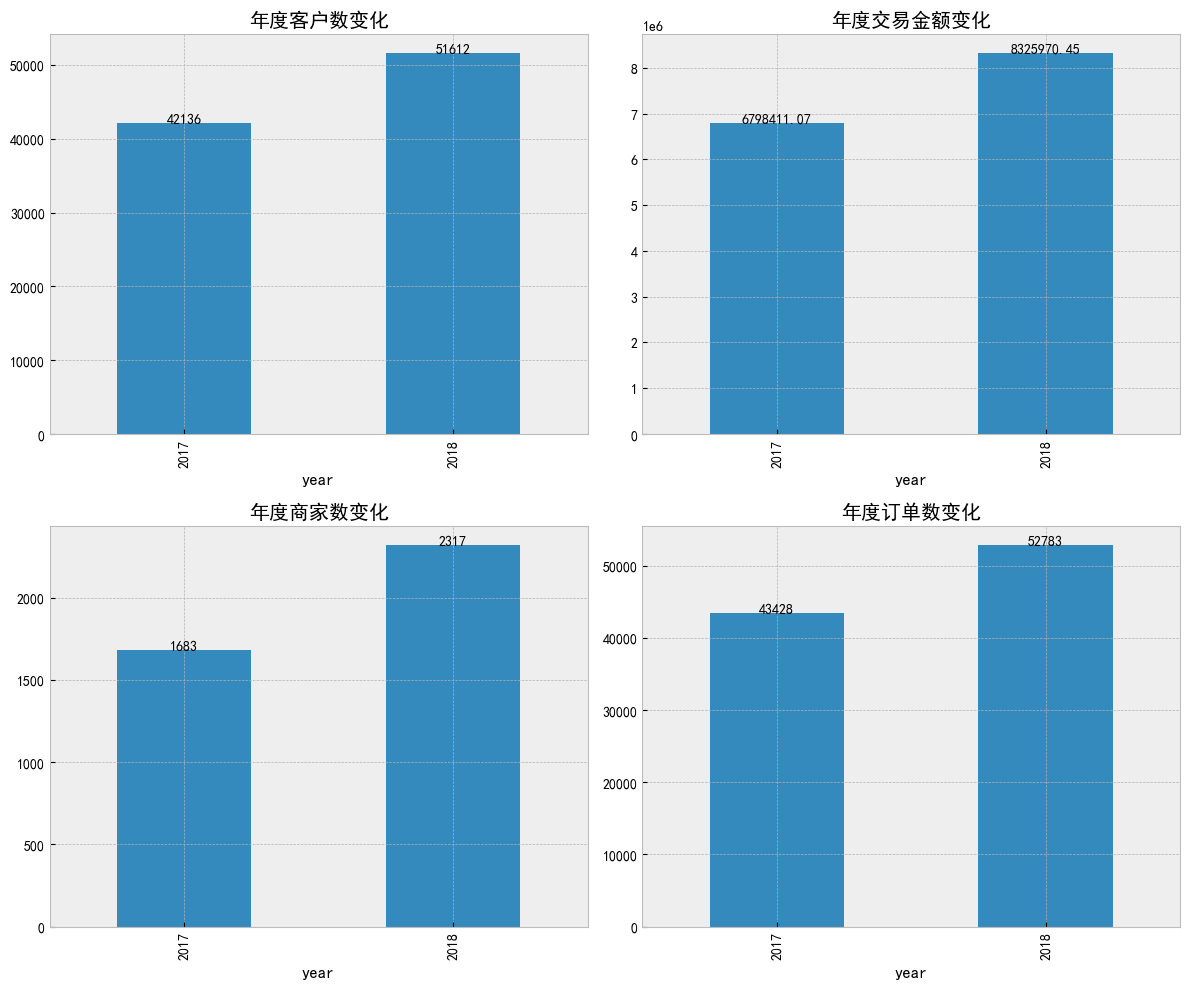

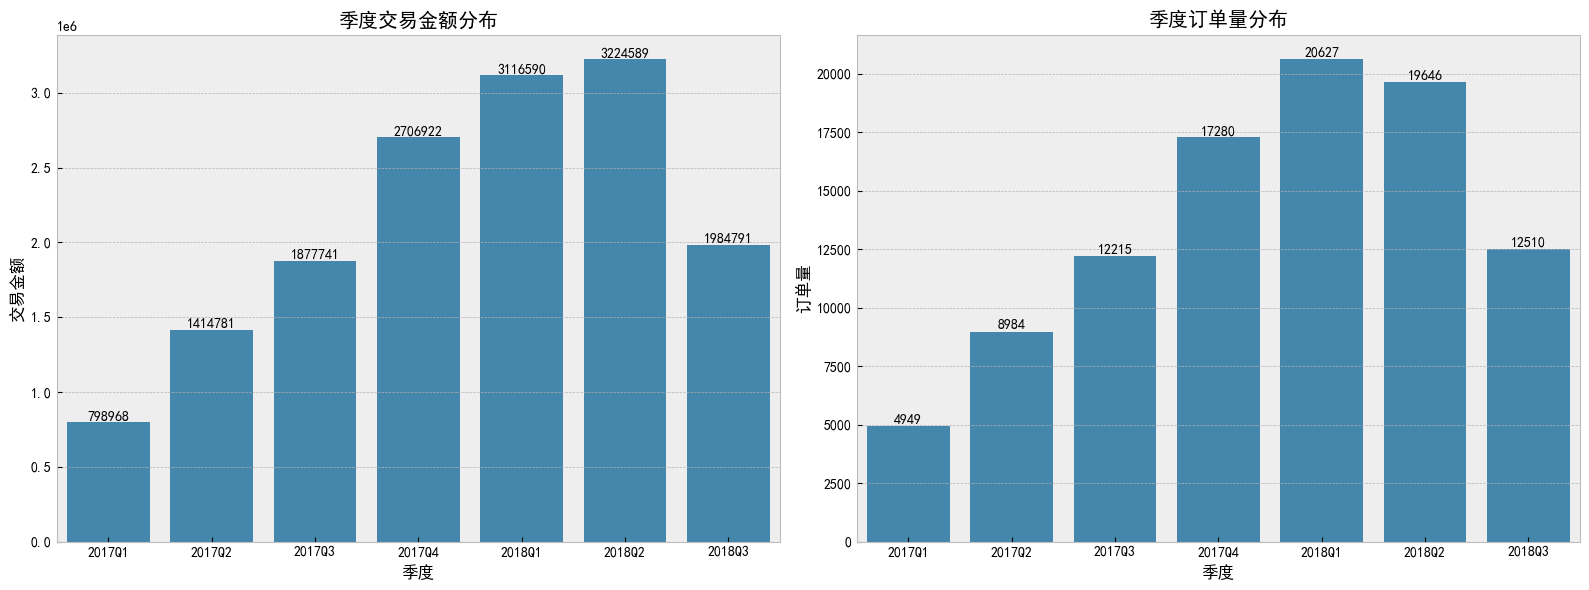

In [78]:
def analyze_quarterly_sales(df: pd.DataFrame) -> None:
    """分析季度交易情况"""
    if df.empty:
        print("没有数据可用于季度分析")
        return
    
    # 提取季度信息
    df['quarter'] = df['下单时间'].dt.to_period('Q')
    
    # 按季度分组统计
    quarterly_data = df.groupby('quarter').agg({
        '支付金额': 'sum',
        '订单ID': pd.Series.nunique
    }).rename(columns={
        '支付金额': '交易金额',
        '订单ID': '订单量'
    }).reset_index()
    
    # 将Period类型转换为字符串以便绘图
    quarterly_data['quarter_str'] = quarterly_data['quarter'].astype(str)
    
    # 创建图表
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 季度交易金额柱状图
    sns.barplot(x='quarter_str', y='交易金额', data=quarterly_data, ax=axes[0])
    axes[0].set_title('季度交易金额分布')
    axes[0].set_xlabel('季度')
    axes[0].set_ylabel('交易金额')
    for i, v in enumerate(quarterly_data['交易金额']):
        axes[0].text(i, v + 10000, f'{v:.0f}', ha='center', rotation=0)
    
    # 季度订单量柱状图
    sns.barplot(x='quarter_str', y='订单量', data=quarterly_data, ax=axes[1])
    axes[1].set_title('季度订单量分布')
    axes[1].set_xlabel('季度')
    axes[1].set_ylabel('订单量')
    for i, v in enumerate(quarterly_data['订单量']):
        axes[1].text(i, v + 100, f'{v}', ha='center', rotation=0)
    
    plt.tight_layout()
    plt.savefig('quarterly_sales.png')
    print("季度分析图表已保存为 quarterly_sales.png")
    
    # 打印分析结果
    max_quarter_amount = quarterly_data.loc[quarterly_data['交易金额'].idxmax()]
    max_quarter_orders = quarterly_data.loc[quarterly_data['订单量'].idxmax()]
    
    print("\n季度交易分析结果:")
    print(f"交易金额最高的季度: {max_quarter_amount['quarter_str']}，金额为 {max_quarter_amount['交易金额']:.2f} 元")
    print(f"订单量最高的季度: {max_quarter_orders['quarter_str']}，订单量为 {max_quarter_orders['订单量']}")

# 加载数据
df = load_data(file_path)
    
# 计算基础指标
user_count, total_amount, customer_unit_price, order_count, order_unit_price = calculate_basic_metrics(df)
print("\n基础业务指标:")
print(f"去重客户数: {user_count}")
print(f"总交易金额: {total_amount:.2f}")
print(f"客单价(总金额/去重客户数): {customer_unit_price:.2f}")
print(f"订单量: {order_count}")
print(f"笔单价(总金额/订单数): {order_unit_price:.2f}")
    
    # 分析趋势
trend = analyze_recent_trends(df, years=2)
if trend is not None:
    print("\n近2年业务趋势:")
    print(trend.to_string(float_format='{:.2f}'.format))
        
    # 可视化趋势
    visualize_trends(trend)

analyze_quarterly_sales(df)


<mark> 这些指标共同构成了业务的 “基本面”，例如：若客单价高但订单量低，可能说明用户消费能力强但购买频率低；若笔单价低但订单量高，可能以小额高频交易为主。<mark>

<mark>季度分析聚焦于中短期周期的业务波动，反映季节性或季度性因素的影响,季度交易金额和订单量的峰值通常与季节相关（如 Q4 可能因年终促销、节假日购物潮而走高）；季度间的波动幅度（如 Q1 到 Q2 的增长 / 下降）可用于评估季度目标的达成情况，为下一季度的资源分配提供参考。
<mark>

月度分析图表已保存为 monthly_sales.png

月度交易分析结果:
交易金额最高的月份: 2017-11，金额为 1138352.92 元，环比增长率为 54.11%
该月订单量: 7289


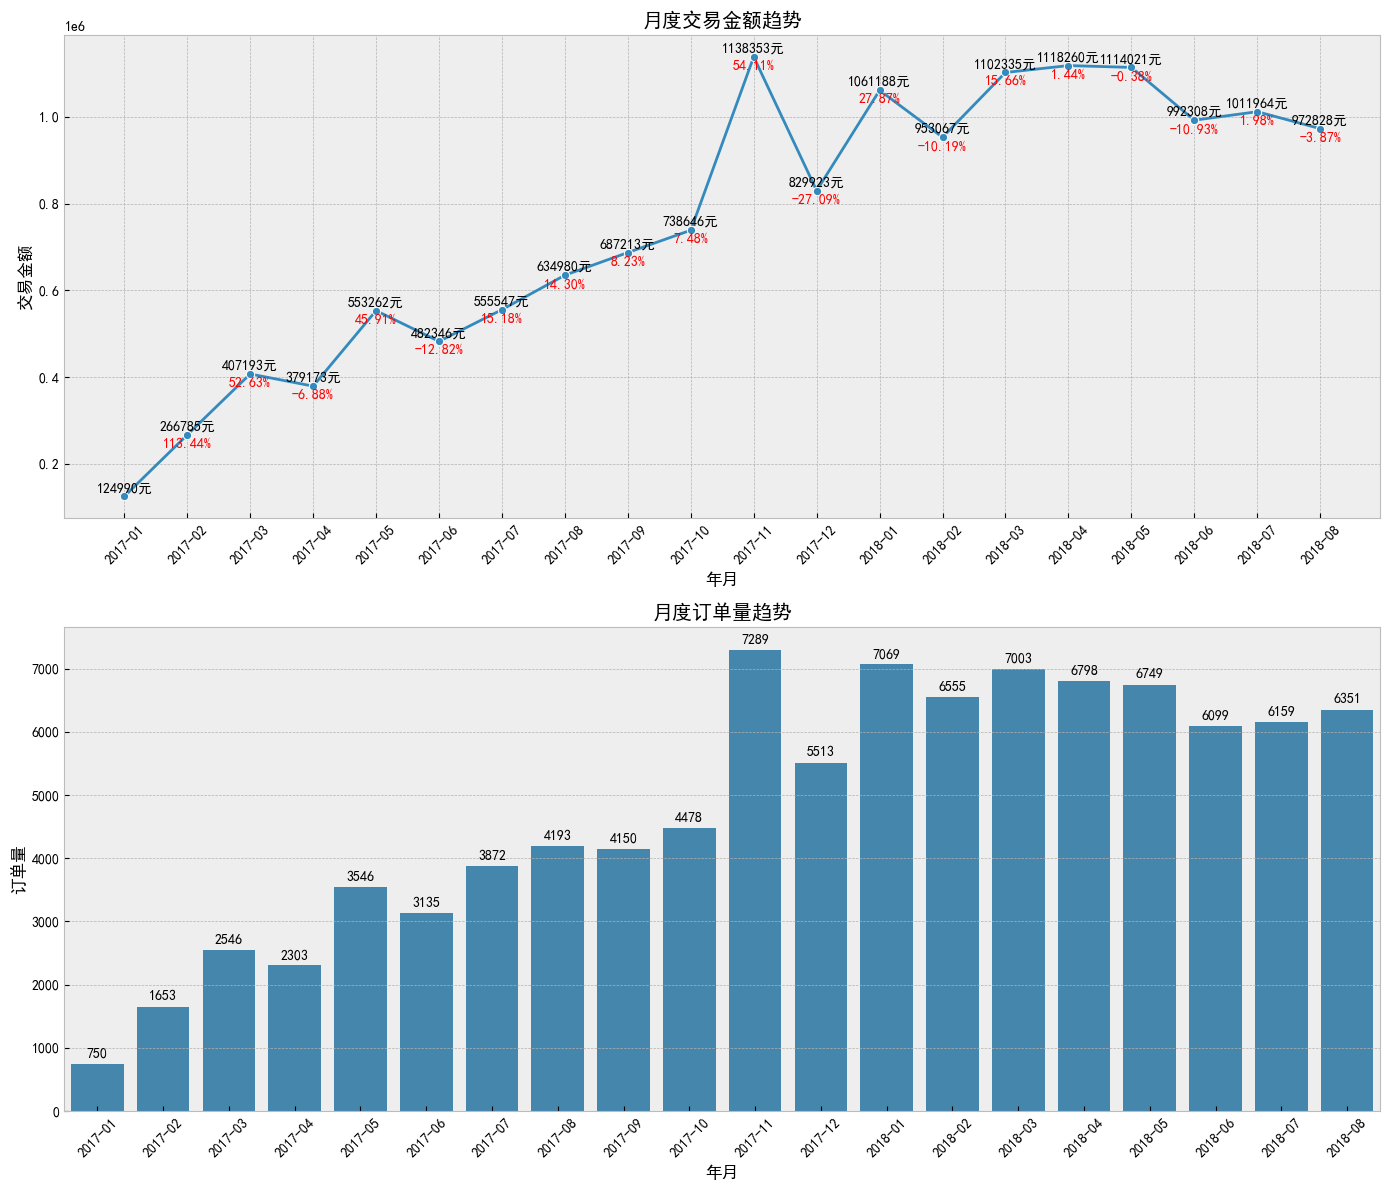

In [79]:
def analyze_monthly_sales(df: pd.DataFrame) -> None:
    """分析月度交易情况"""
    if df.empty:
        print("没有数据可用于月度分析")
        return
    
    # 提取年月信息
    df['年月'] = df['下单时间'].dt.strftime('%Y-%m')
    
    # 按月分组统计
    monthly_data = df.groupby('年月').agg({
        '支付金额': 'sum',
        '订单ID': pd.Series.nunique
    }).rename(columns={
        '支付金额': '交易金额',
        '订单ID': '订单量'
    }).reset_index()
    
    # 计算环比增长率
    monthly_data['交易金额环比增长率'] = monthly_data['交易金额'].pct_change() * 100
    
    # 创建图表
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    # 月度交易金额折线图
    sns.lineplot(x='年月', y='交易金额', data=monthly_data, marker='o', ax=axes[0])
    axes[0].set_title('月度交易金额趋势')
    axes[0].set_xlabel('年月')
    axes[0].set_ylabel('交易金额')
    axes[0].tick_params(axis='x', rotation=45)
    
    # 在折线图上标注交易金额和增长率
    for i, row in monthly_data.iterrows():
        axes[0].text(row['年月'], row['交易金额'] + 10000, f"{row['交易金额']:.0f}元", ha='center')
        if i > 0:  # 跳过第一个月，因为没有环比数据
            axes[0].text(row['年月'], row['交易金额'] - 30000, 
                        f"{row['交易金额环比增长率']:.2f}%", ha='center', color='red')
    
    # 月度订单量柱状图
    sns.barplot(x='年月', y='订单量', data=monthly_data, ax=axes[1])
    axes[1].set_title('月度订单量趋势')
    axes[1].set_xlabel('年月')
    axes[1].set_ylabel('订单量')
    axes[1].tick_params(axis='x', rotation=45)
    
    # 在柱状图上标注订单量
    for i, v in enumerate(monthly_data['订单量']):
        axes[1].text(i, v + 100, f'{v}', ha='center')
    
    plt.tight_layout()
    plt.savefig('monthly_sales.png')
    print("月度分析图表已保存为 monthly_sales.png")
    
    # 打印分析结果
    max_month = monthly_data.loc[monthly_data['交易金额'].idxmax()]
    print("\n月度交易分析结果:")
    print(f"交易金额最高的月份: {max_month['年月']}，金额为 {max_month['交易金额']:.2f} 元，环比增长率为 {max_month['交易金额环比增长率']:.2f}%")
    print(f"该月订单量: {max_month['订单量']}")
 # 季度交易分析
    
    # 月度交易分析
analyze_monthly_sales(df)


<mark>月度分析比季度分析更精细，通过环比增长率（与上月对比）可捕捉短期业务波动.环比增长率为正且较高（如 > 20%），可能与当月的促销活动、新品上线相关；交易金额最高的月份通常对应关键节点，其成功经验可复用于其他月份。<mark>


2017年11月每日分析图表已保存为 november_2017_daily.png

2017年11月每日交易分析结果:
交易金额最高的日期: 11月24.0日，金额为 173894.10 元
订单量最高的日期: 11月24.0日，订单量为 1147.0
注意: 11月24日是黑色星期五，这可能是销量激增的原因之一


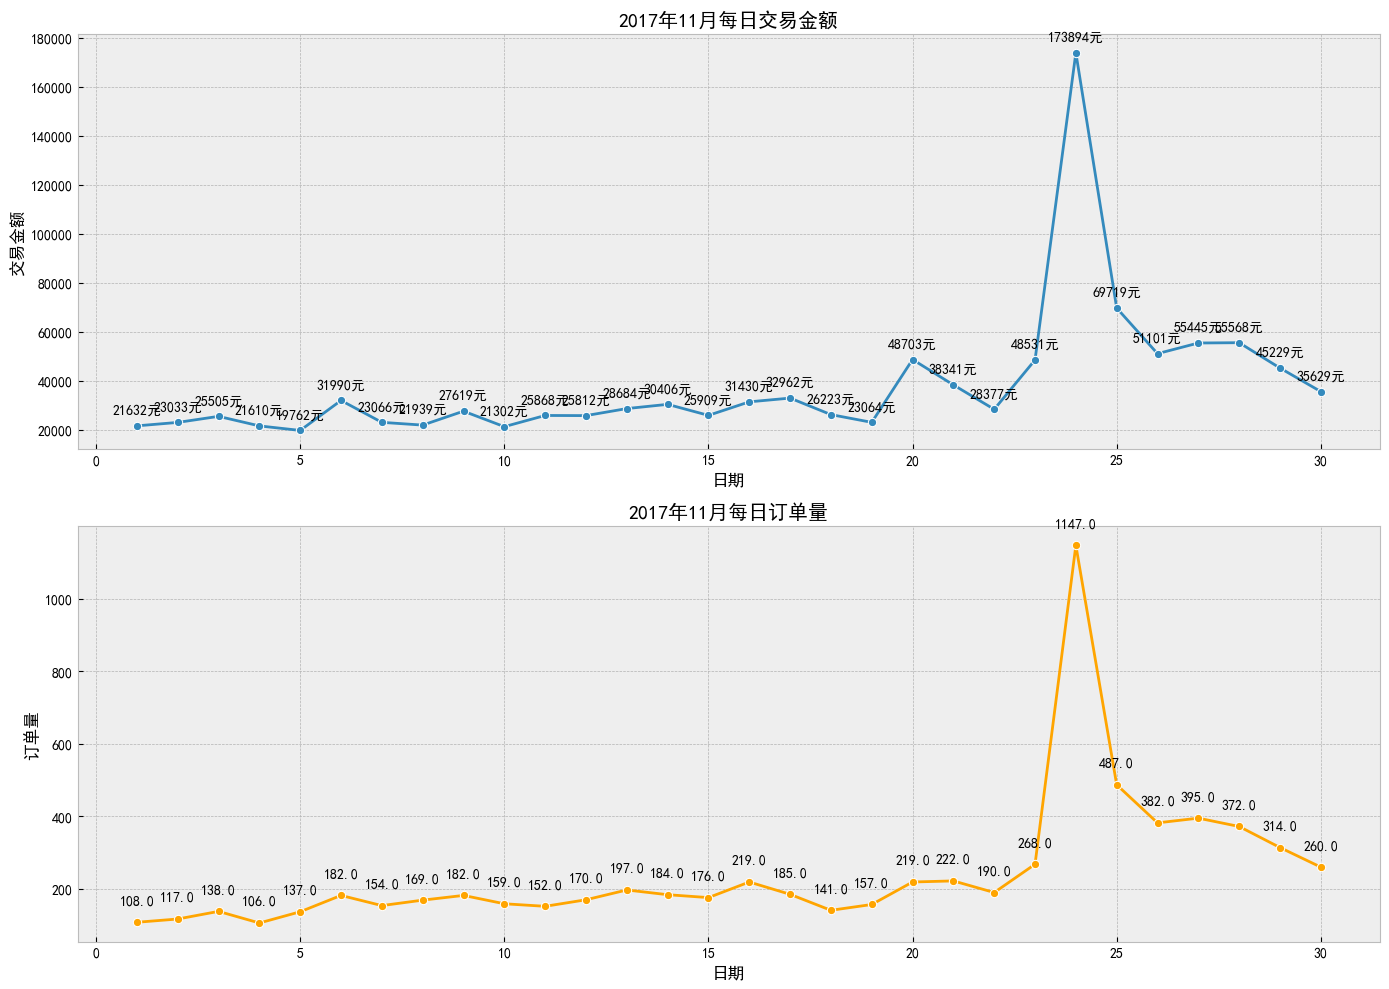

In [80]:
def drill_down_november_2017(df: pd.DataFrame) -> None:
    """深入分析2017年11月的交易情况"""
    if df.empty:
        print("没有数据可用于深入分析")
        return
    
    # 筛选2017年11月的数据
    nov_2017 = df[(df['下单时间'].dt.year == 2017) & (df['下单时间'].dt.month == 11)]
    
    if nov_2017.empty:
        print("没有2017年11月的数据")
        return
    
    # 按日统计
    daily_data = nov_2017.groupby(nov_2017['下单时间'].dt.day).agg({
        '支付金额': 'sum',
        '订单ID': pd.Series.nunique
    }).rename(columns={
        '支付金额': '交易金额',
        '订单ID': '订单量'
    }).reset_index().rename(columns={'下单时间': '日期'})
    
    # 创建图表
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # 每日交易金额折线图
    sns.lineplot(x='日期', y='交易金额', data=daily_data, marker='o', ax=axes[0])
    axes[0].set_title('2017年11月每日交易金额')
    axes[0].set_xlabel('日期')
    axes[0].set_ylabel('交易金额')
    
    # 在折线图上标注交易金额
    for i, row in daily_data.iterrows():
        axes[0].text(row['日期'], row['交易金额'] + 5000, f"{row['交易金额']:.0f}元", ha='center')
    
    # 每日订单量折线图
    sns.lineplot(x='日期', y='订单量', data=daily_data, marker='o', ax=axes[1], color='orange')
    axes[1].set_title('2017年11月每日订单量')
    axes[1].set_xlabel('日期')
    axes[1].set_ylabel('订单量')
    
    # 在折线图上标注订单量
    for i, row in daily_data.iterrows():
        axes[1].text(row['日期'], row['订单量'] + 50, f"{row['订单量']}", ha='center')
    
    plt.tight_layout()
    plt.savefig('november_2017_daily.png')
    print("2017年11月每日分析图表已保存为 november_2017_daily.png")
    
    # 找出峰值日期
    max_amount_day = daily_data.loc[daily_data['交易金额'].idxmax()]
    max_orders_day = daily_data.loc[daily_data['订单量'].idxmax()]
    
    print("\n2017年11月每日交易分析结果:")
    print(f"交易金额最高的日期: 11月{max_amount_day['日期']}日，金额为 {max_amount_day['交易金额']:.2f} 元")
    print(f"订单量最高的日期: 11月{max_orders_day['日期']}日，订单量为 {max_orders_day['订单量']}")
    
    # 检查是否是黑色星期五
    black_friday = 24  # 2017年11月24日是黑色星期五
    if max_amount_day['日期'] == black_friday or max_orders_day['日期'] == black_friday:
        print(f"注意: 11月{black_friday}日是黑色星期五，这可能是销量激增的原因之一")
            
    # 深入分析2017年11月
drill_down_november_2017(df)
  

<mark>11 月的交易峰值通常与 “黑色星期五”（11 月第四个周五）等购物节相关，说明节日促销对短期销量的拉动作用显著；
<mark>若峰值日期与重大促销活动重合，可验证活动的有效性，为后续活动策划提供参考；
每日数据的波动（如促销前的预热、促销后的回落）反映用户的购物节奏，可用于优化活动周期（如延长预热期、追加返场活动）。<mark>

城市交易分析图表已保存为 city_sales.png

城市交易分析结果:
交易金额最高的城市: sao paulo，金额为 2070476.96 元
订单量最高的城市: sao paulo，订单量为 15014
sao paulo的交易金额占总体的比例: 13.69%
sao paulo的订单量占总体的比例: 15.61%


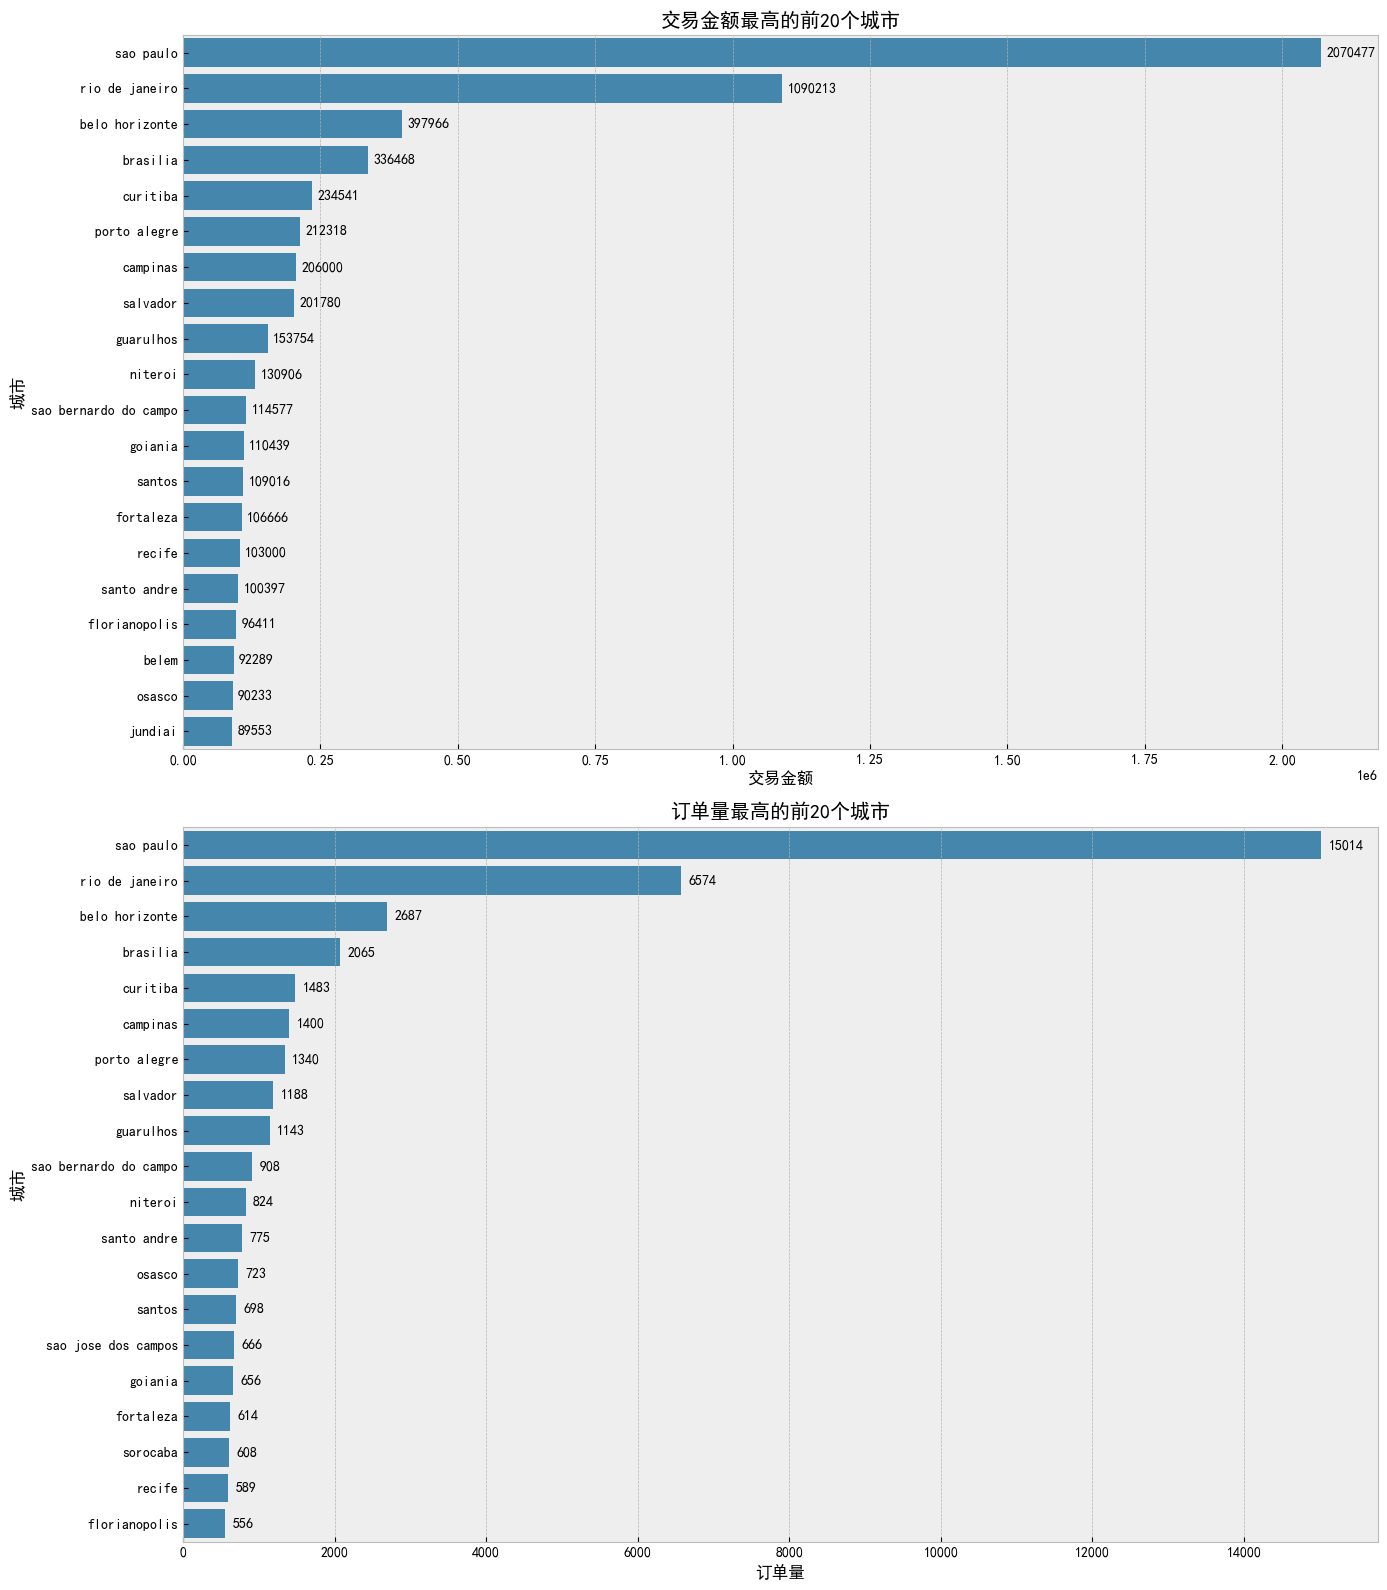

In [81]:
def analyze_city_sales(df: pd.DataFrame, top_n: int = 20) -> None:
    """分析各城市交易情况"""
    if df.empty:
        print("没有数据可用于城市分析")
        return
    
    # 按城市分组统计
    city_data = df.groupby('客户城市').agg({
        '支付金额': 'sum',
        '订单ID': pd.Series.nunique
    }).rename(columns={
        '支付金额': '交易金额',
        '订单ID': '订单量'
    }).reset_index()
    
    # 按交易金额排序并取前top_n个城市
    top_cities_by_amount = city_data.sort_values('交易金额', ascending=False).head(top_n)
    
    # 按订单量排序并取前top_n个城市
    top_cities_by_orders = city_data.sort_values('订单量', ascending=False).head(top_n)
    
    # 创建图表
    fig, axes = plt.subplots(2, 1, figsize=(14, 16))
    
    # 交易金额最高的城市柱状图
    sns.barplot(x='交易金额', y='客户城市', data=top_cities_by_amount, ax=axes[0])
    axes[0].set_title(f'交易金额最高的前{top_n}个城市')
    axes[0].set_xlabel('交易金额')
    axes[0].set_ylabel('城市')
    for i, v in enumerate(top_cities_by_amount['交易金额']):
        axes[0].text(v + 10000, i, f'{v:.0f}', va='center')
    
    # 订单量最高的城市柱状图
    sns.barplot(x='订单量', y='客户城市', data=top_cities_by_orders, ax=axes[1])
    axes[1].set_title(f'订单量最高的前{top_n}个城市')
    axes[1].set_xlabel('订单量')
    axes[1].set_ylabel('城市')
    for i, v in enumerate(top_cities_by_orders['订单量']):
        axes[1].text(v + 100, i, f'{v}', va='center')
    
    plt.tight_layout()
    plt.savefig('city_sales.png')
    print(f"城市交易分析图表已保存为 city_sales.png")
    
    # 打印分析结果
    top_city_by_amount = top_cities_by_amount.iloc[0]
    top_city_by_orders = top_cities_by_orders.iloc[0]
    
    print("\n城市交易分析结果:")
    print(f"交易金额最高的城市: {top_city_by_amount['客户城市']}，金额为 {top_city_by_amount['交易金额']:.2f} 元")
    print(f"订单量最高的城市: {top_city_by_orders['客户城市']}，订单量为 {top_city_by_orders['订单量']}")
    
    # 计算占比
    total_amount = city_data['交易金额'].sum()
    total_orders = city_data['订单量'].sum()
    
    print(f"{top_city_by_amount['客户城市']}的交易金额占总体的比例: {top_city_by_amount['交易金额']/total_amount*100:.2f}%")
    print(f"{top_city_by_orders['客户城市']}的订单量占总体的比例: {top_city_by_orders['订单量']/total_orders*100:.2f}%")
  
    # 城市交易分析
analyze_city_sales(df, top_n=20)
    

工作日交易分析图表已保存为 weekday_sales.png

工作日交易分析结果:
交易金额最高的是: 周一，金额为 2493352.79 元
订单量最高的是: 周一，订单量为 15660

工作日与周末对比:
                   交易金额    订单量
is_weekday                    
周末           3445544.32  22134
工作日         11678837.20  74077


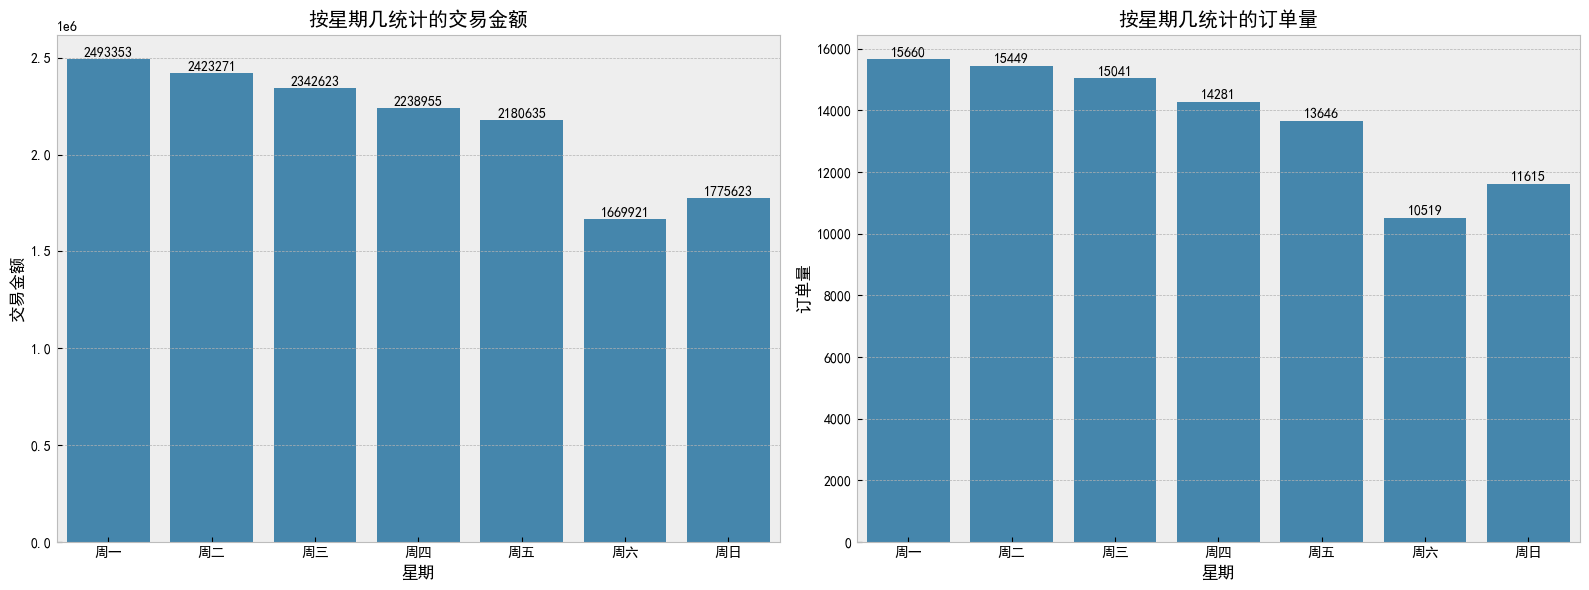

In [82]:
def analyze_weekday_sales(df: pd.DataFrame) -> None:
    """分析工作日交易情况"""
    if df.empty:
        print("没有数据可用于工作日分析")
        return
    
    # 提取星期几信息 (0=周一, 6=周日)
    df['weekday'] = df['下单时间'].dt.weekday
    
    # 按星期几分组统计
    weekday_data = df.groupby('weekday').agg({
        '支付金额': 'sum',
        '订单ID': pd.Series.nunique
    }).rename(columns={
        '支付金额': '交易金额',
        '订单ID': '订单量'
    }).reset_index()
    
    # 将星期几数字转换为中文
    weekday_names = ['周一', '周二', '周三', '周四', '周五', '周六', '周日']
    weekday_data['weekday_name'] = weekday_data['weekday'].apply(lambda x: weekday_names[x])
    
    # 创建图表
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 按星期几统计的交易金额柱状图
    sns.barplot(x='weekday_name', y='交易金额', data=weekday_data, ax=axes[0])
    axes[0].set_title('按星期几统计的交易金额')
    axes[0].set_xlabel('星期')
    axes[0].set_ylabel('交易金额')
    for i, v in enumerate(weekday_data['交易金额']):
        axes[0].text(i, v + 10000, f'{v:.0f}', ha='center')
    
    # 按星期几统计的订单量柱状图
    sns.barplot(x='weekday_name', y='订单量', data=weekday_data, ax=axes[1])
    axes[1].set_title('按星期几统计的订单量')
    axes[1].set_xlabel('星期')
    axes[1].set_ylabel('订单量')
    for i, v in enumerate(weekday_data['订单量']):
        axes[1].text(i, v + 100, f'{v}', ha='center')
    
    plt.tight_layout()
    plt.savefig('weekday_sales.png')
    print("工作日交易分析图表已保存为 weekday_sales.png")
    
    # 打印分析结果
    max_amount_weekday = weekday_data.loc[weekday_data['交易金额'].idxmax()]
    max_orders_weekday = weekday_data.loc[weekday_data['订单量'].idxmax()]
    
    print("\n工作日交易分析结果:")
    print(f"交易金额最高的是: {max_amount_weekday['weekday_name']}，金额为 {max_amount_weekday['交易金额']:.2f} 元")
    print(f"订单量最高的是: {max_orders_weekday['weekday_name']}，订单量为 {max_orders_weekday['订单量']}")
    
    # 区分工作日和周末
    weekday_data['is_weekday'] = weekday_data['weekday'] < 5
    weekday_stats = weekday_data.groupby('is_weekday').agg({
        '交易金额': 'sum',
        '订单量': 'sum'
    }).rename(index={True: '工作日', False: '周末'})
    
    print("\n工作日与周末对比:")
    print(weekday_stats)


    # 工作日交易分析
analyze_weekday_sales(df)
    

时间段交易分析图表已保存为 time_period_sales.png

时间段交易分析结果:
交易金额最高的小时: 14点，金额为 1059494.65 元
订单量最高的小时: 16点，订单量为 6460

按时间段统计的交易情况:
   time_period        交易金额    订单量
0   上午 (7-12点)  3277506.01  21047
1  下午 (12-18点)  5944396.22  37083
2  晚上 (18-23点)  4576080.90  29020
3   深夜 (23-7点)  1326398.39   9061


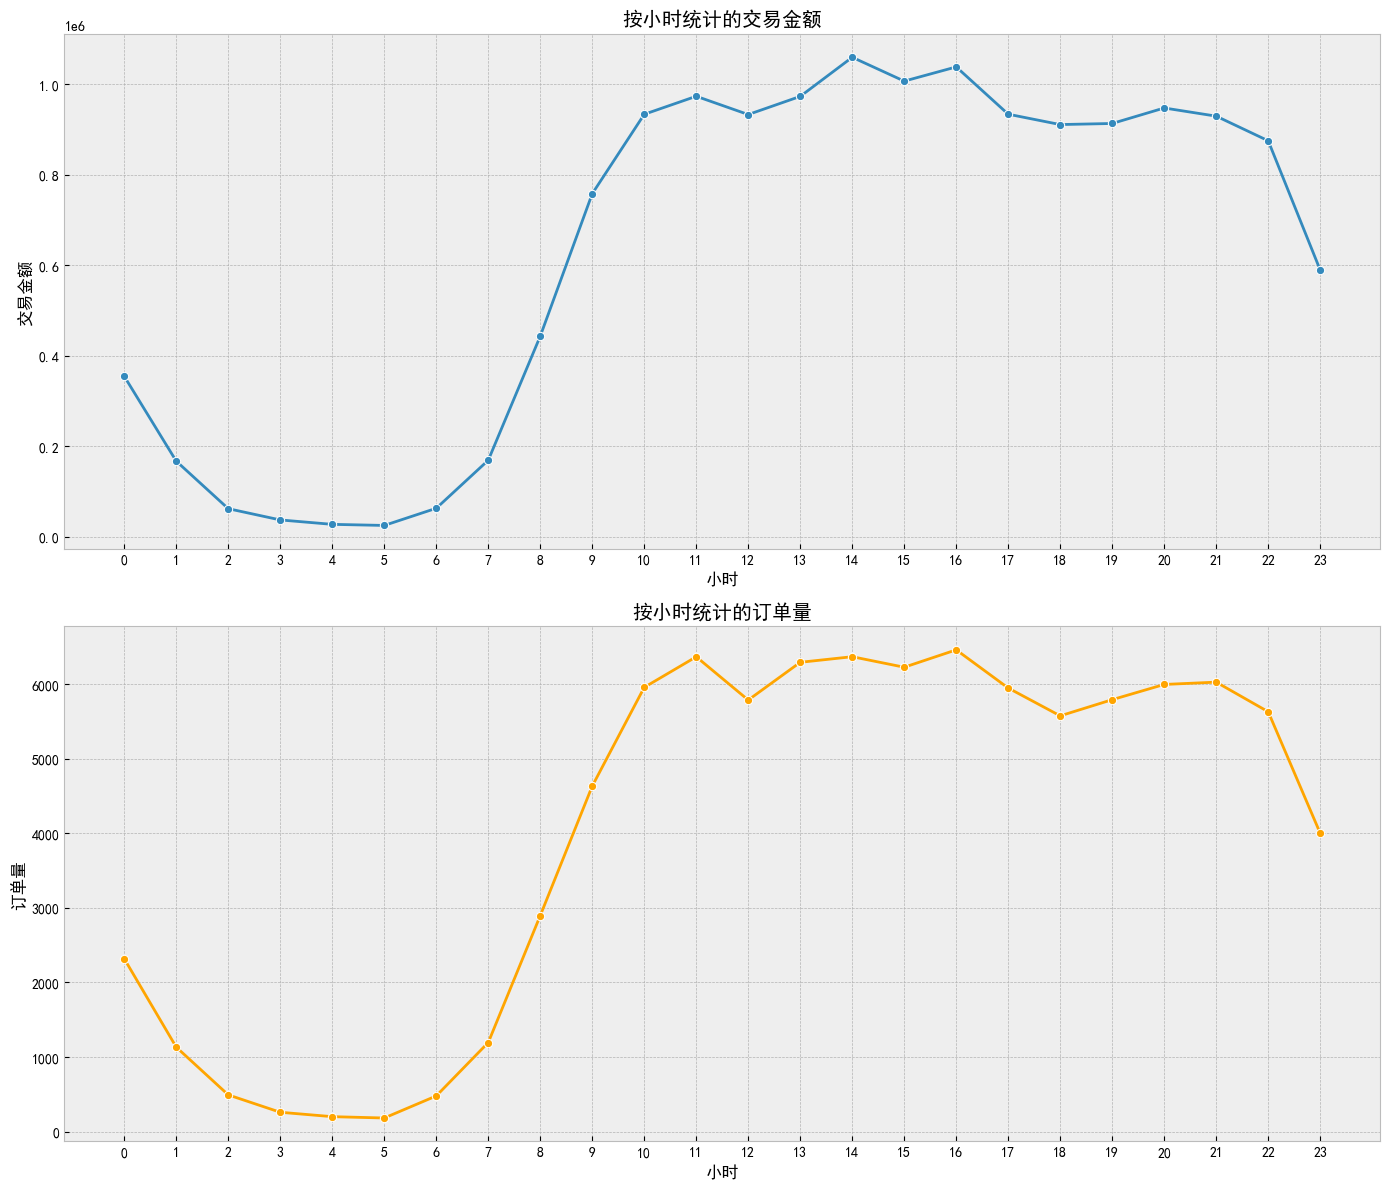

In [83]:
def analyze_time_period_sales(df: pd.DataFrame) -> None:
    """分析时间段交易情况"""
    if df.empty:
        print("没有数据可用于时间段分析")
        return
    
    # 提取小时信息
    df['hour'] = df['下单时间'].dt.hour
    
    # 按小时分组统计
    hour_data = df.groupby('hour').agg({
        '支付金额': 'sum',
        '订单ID': pd.Series.nunique
    }).rename(columns={
        '支付金额': '交易金额',
        '订单ID': '订单量'
    }).reset_index()
    
    # 创建时间段标签
    def get_time_period(hour):
        if 7 <= hour < 12:
            return '上午 (7-12点)'
        elif 12 <= hour < 18:
            return '下午 (12-18点)'
        elif 18 <= hour < 23:
            return '晚上 (18-23点)'
        else:
            return '深夜 (23-7点)'
    
    hour_data['time_period'] = hour_data['hour'].apply(get_time_period)
    
    # 按时间段分组统计
    period_data = hour_data.groupby('time_period').agg({
        '交易金额': 'sum',
        '订单量': 'sum'
    }).reset_index()
    
    # 创建图表
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    
    # 按小时统计的交易金额折线图
    sns.lineplot(x='hour', y='交易金额', data=hour_data, marker='o', ax=axes[0])
    axes[0].set_title('按小时统计的交易金额')
    axes[0].set_xlabel('小时')
    axes[0].set_ylabel('交易金额')
    axes[0].set_xticks(range(0, 24))
    
    # 按小时统计的订单量折线图
    sns.lineplot(x='hour', y='订单量', data=hour_data, marker='o', ax=axes[1], color='orange')
    axes[1].set_title('按小时统计的订单量')
    axes[1].set_xlabel('小时')
    axes[1].set_ylabel('订单量')
    axes[1].set_xticks(range(0, 24))
    
    plt.tight_layout()
    plt.savefig('time_period_sales.png')
    print("时间段交易分析图表已保存为 time_period_sales.png")
    
    # 打印分析结果
    max_amount_hour = hour_data.loc[hour_data['交易金额'].idxmax()]
    max_orders_hour = hour_data.loc[hour_data['订单量'].idxmax()]
    
    print("\n时间段交易分析结果:")
    print(f"交易金额最高的小时: {max_amount_hour['hour']}点，金额为 {max_amount_hour['交易金额']:.2f} 元")
    print(f"订单量最高的小时: {max_orders_hour['hour']}点，订单量为 {max_orders_hour['订单量']}")
    
    print("\n按时间段统计的交易情况:")
    print(period_data)

    # 时间段交易分析
analyze_time_period_sales(df)
    

<mark>将时间维度细化到小时，实现 “精准到点” 的运营策略，最大化活动效果。交易高峰通常出现在用户碎片化时间（如早 8-9 点通勤、午 12-13 点午休、晚 20-22 点睡前），说明用户习惯在空闲时段浏览购物；
若 “晚上（18-23 点）” 交易占比最高（如超过 50%），可将核心活动（如秒杀、直播）安排在该时段，提升参与度；
深夜（23-7 点）的订单量反映 “夜猫子” 用户群体的存在，可通过夜间专属优惠覆盖该群体。<mark>

州分布分析图表已保存为 state_distribution.png

商家州分布分析结果:
主要集中的州:
SP州: 商家数 1744，占比 59.44%
PR州: 商家数 332，占比 11.32%
MG州: 商家数 234，占比 7.98%
SC州: 商家数 184，占比 6.27%

SP, PR, MG, SC这4个州的商家数占了总体的85.00%
SP, PR, MG, SC这4个州的累计交易金额占总体的86.20%
SP, PR, MG, SC这4个州的累计订单量占总体的90.26%


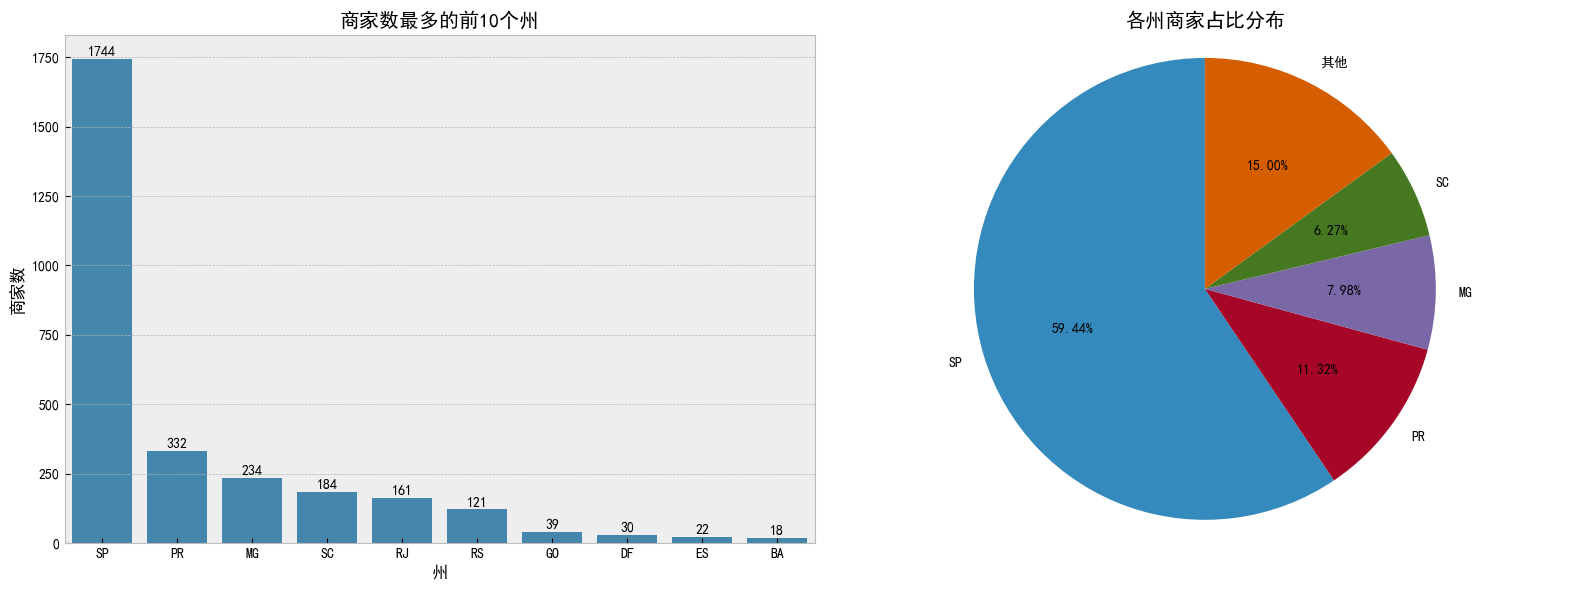

In [84]:
def analyze_state_distribution(df: pd.DataFrame) -> None:
    """分析商家州分布情况"""
    if df.empty:
        print("没有数据可用于州分布分析")
        return
    
    # 按州分组统计商家数量
    state_data = df.groupby('卖家州').agg({
        '卖家ID': pd.Series.nunique
    }).rename(columns={
        '卖家ID': '商家数'
    }).reset_index()
    
    # 计算商家总数
    total_sellers = state_data['商家数'].sum()
    
    # 计算各州商家占比
    state_data['占比'] = state_data['商家数'] / total_sellers * 100
    
    # 按商家数排序
    state_data = state_data.sort_values('商家数', ascending=False)
    
    # 计算累计占比
    state_data['累计占比'] = state_data['占比'].cumsum()
    
    # 找出主要的州
    major_states = state_data[state_data['累计占比'] <= 80].copy()
    
    # 如果累计占比不足80%，则添加下一个州
    if not major_states.empty and major_states.iloc[-1]['累计占比'] < 80:
        next_state = state_data.iloc[len(major_states)]
        major_states = pd.concat([major_states, pd.DataFrame([next_state])])
    
    # 计算其他州的商家数和占比
    other_sellers = total_sellers - major_states['商家数'].sum()
    other_percentage = 100 - major_states['占比'].sum()
    
    # 创建饼图数据
    pie_data = pd.concat([
        major_states[['卖家州', '商家数', '占比']],
        pd.DataFrame([{
            '卖家州': '其他',
            '商家数': other_sellers,
            '占比': other_percentage
        }])
    ])
    
    # 创建图表
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 各州商家数柱状图
    sns.barplot(x='卖家州', y='商家数', data=state_data.head(10), ax=axes[0])
    axes[0].set_title('商家数最多的前10个州')
    axes[0].set_xlabel('州')
    axes[0].set_ylabel('商家数')
    for i, v in enumerate(state_data.head(10)['商家数']):
        axes[0].text(i, v + 10, f'{v}', ha='center')
    
    # 各州商家占比饼图
    axes[1].pie(pie_data['商家数'], labels=pie_data['卖家州'], autopct='%1.2f%%', startangle=90)
    axes[1].set_title('各州商家占比分布')
    axes[1].axis('equal')  # 保证饼图是圆的
    
    plt.tight_layout()
    plt.savefig('state_distribution.png')
    print("州分布分析图表已保存为 state_distribution.png")
    
    # 打印分析结果
    print("\n商家州分布分析结果:")
    print("主要集中的州:")
    for _, row in major_states.iterrows():
        print(f"{row['卖家州']}州: 商家数 {row['商家数']}，占比 {row['占比']:.2f}%")
    
    print(f"\n{', '.join(major_states['卖家州'].tolist())}这{len(major_states)}个州的商家数占了总体的{major_states['占比'].sum():.2f}%")
    
    # 分析交易金额和订单量在主要州的分布
    state_sales = df.groupby('卖家州').agg({
        '支付金额': 'sum',
        '订单ID': pd.Series.nunique
    }).rename(columns={
        '支付金额': '交易金额',
        '订单ID': '订单量'
    }).reset_index()
    
    # 计算交易总额和订单总量
    total_sales_amount = state_sales['交易金额'].sum()
    total_orders = state_sales['订单量'].sum()
    
    # 计算主要州的交易金额和订单量占比
    major_state_sales = state_sales[state_sales['卖家州'].isin(major_states['卖家州'])]
    major_state_amount_percentage = major_state_sales['交易金额'].sum() / total_sales_amount * 100
    major_state_orders_percentage = major_state_sales['订单量'].sum() / total_orders * 100
    
    print(f"{', '.join(major_states['卖家州'].tolist())}这{len(major_states)}个州的累计交易金额占总体的{major_state_amount_percentage:.2f}%")
    print(f"{', '.join(major_states['卖家州'].tolist())}这{len(major_states)}个州的累计订单量占总体的{major_state_orders_percentage:.2f}%")

    # 商家州分布分析
analyze_state_distribution(df)
  

<mark>商家集中的州（如占比 80% 的少数州）通常是经济活跃、供应链成熟的地区，可优先优化这些州的物流效率（如建立区域仓），提升配送速度；
若 “商家集中州” 的交易金额和订单量占比也高（如 > 80%），说明供需匹配良好；若占比低，可能存在商家竞争激烈、用户覆盖不足的问题；
商家稀疏的州可能存在物流成本高、供货不足的问题，可通过吸引本地商家入驻、补贴物流等方式改善。<mark>


州级客户分布图表已保存为 state_user_distribution.png

用户维度分析结果:
SP州的客户群占比最高，41.94%


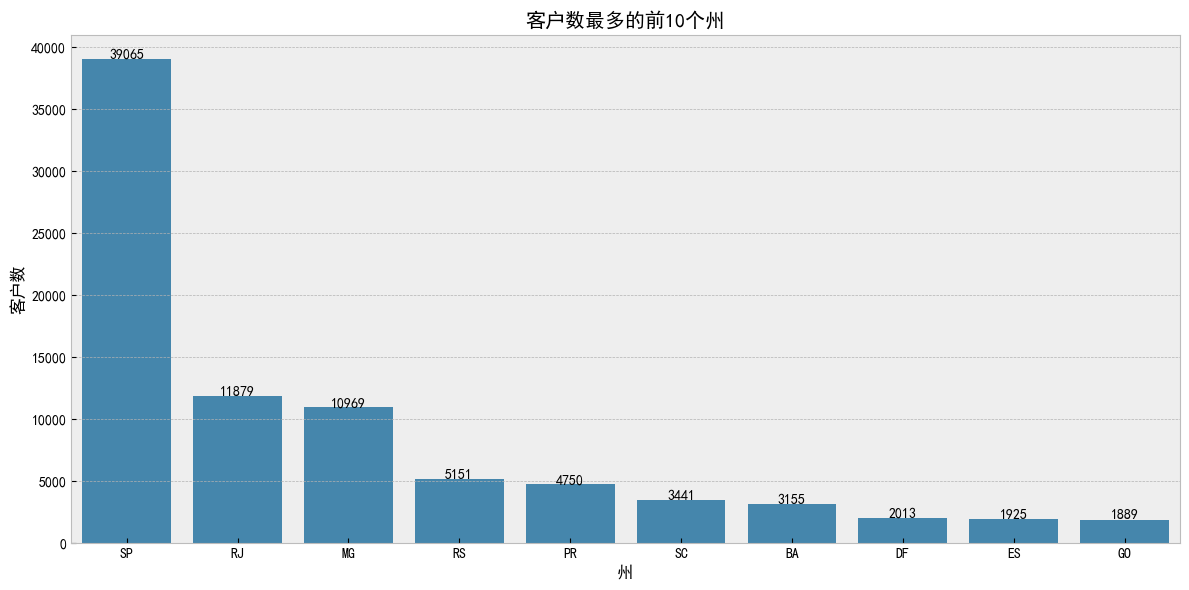

In [85]:
def analyze_user_dimension(df: pd.DataFrame) -> None:
    """分析用户维度数据"""
    if df.empty:
        print("没有数据可用于用户维度分析")
        return
    
    # 分析州级客户分布
    state_user_data = df.groupby('客户州').agg({
        '客户唯一ID': pd.Series.nunique
    }).rename(columns={
        '客户唯一ID': '客户数'
    }).reset_index()
    
    # 计算客户总数
    total_users = state_user_data['客户数'].sum()
    
    # 计算各州客户占比
    state_user_data['占比'] = state_user_data['客户数'] / total_users * 100
    
    # 按客户数排序
    state_user_data = state_user_data.sort_values('客户数', ascending=False)
    
    # 创建图表
    plt.figure(figsize=(12, 6))
    
    # 各州客户数柱状图
    ax = sns.barplot(x='客户州', y='客户数', data=state_user_data.head(10))
    plt.title('客户数最多的前10个州')
    plt.xlabel('州')
    plt.ylabel('客户数')
    for i, v in enumerate(state_user_data.head(10)['客户数']):
        ax.text(i, v + 10, f'{v}', ha='center')
    
    plt.tight_layout()
    plt.savefig('state_user_distribution.png')
    print("州级客户分布图表已保存为 state_user_distribution.png")
    
    # 打印分析结果
    top_state = state_user_data.iloc[0]
    print("\n用户维度分析结果:")
    print(f"{top_state['客户州']}州的客户群占比最高，{top_state['占比']:.2f}%")
    
    # 假设数据中有用户状态字段，分析流失用户
    if '用户状态' in df.columns:
        user_status = df.groupby('用户状态').agg({
            '客户唯一ID': pd.Series.nunique
        }).rename(columns={
            '客户唯一ID': '用户数'
        }).reset_index()
        
        # 计算总用户数
        total_users = user_status['用户数'].sum()
        
        # 计算流失用户占比
        churn_users = user_status[user_status['用户状态'] == '流失']['用户数'].values[0] if '流失' in user_status['用户状态'].values else 0
        churn_percentage = churn_users / total_users * 100
        
        print(f"流失用户占比: {churn_percentage:.2f}%")
        
        # 分析重要用户
        important_users = ['重要深耕用户', '重要挽回客户', '重要价值客户']
        important_user_data = user_status[user_status['用户状态'].isin(important_users)].copy()
        
        if not important_user_data.empty:
            # 计算重要用户交易金额
            important_user_amount = df[df['用户状态'].isin(important_users)].groupby('用户状态').agg({
                '支付金额': 'sum'
            }).rename(columns={
                '支付金额': '交易金额'
            }).reset_index()
            
            # 合并数据
            important_user_data = pd.merge(important_user_data, important_user_amount, on='用户状态')
            
            # 计算占比
            important_user_data['用户占比'] = important_user_data['用户数'] / total_users * 100
            important_user_data['金额占比'] = important_user_data['交易金额'] / df['支付金额'].sum() * 100
            
            print("\n重要用户分析:")
            print(important_user_data)
            
            # 计算重要深耕用户和重要挽留客户的交易金额总占比
            key_users = important_user_data[important_user_data['用户状态'].isin(['重要深耕用户', '重要挽回客户'])]
            key_users_amount_percentage = key_users['金额占比'].sum()
            print(f"重要深耕用户和重要挽回客户的交易金额总占比: {key_users_amount_percentage:.2f}%")
    
    # 分析评论时间分布
    if '评论时间' in df.columns and '评论分数' in df.columns:
        # 转换评论时间为小时
        df['评论小时'] = pd.to_datetime(df['评论时间']).dt.hour
        
        # 按小时统计评论数
        comment_hour_data = df.groupby('评论小时').agg({
            '订单ID': pd.Series.nunique
        }).rename(columns={
            '订单ID': '评论数'
        }).reset_index()
        
        # 创建图表
        plt.figure(figsize=(12, 6))
        
        # 评论时间分布柱状图
        ax = sns.barplot(x='评论小时', y='评论数', data=comment_hour_data)
        plt.title('评论时间分布')
        plt.xlabel('小时')
        plt.ylabel('评论数')
        for i, v in enumerate(comment_hour_data['评论数']):
            ax.text(i, v + 10, f'{v}', ha='center')
        
        plt.tight_layout()
        plt.savefig('comment_time_distribution.png')
        print("评论时间分布图表已保存为 comment_time_distribution.png")
        
        # 找出评论最多的时间段
        peak_hours = comment_score_data = df.groupby('评论分数').agg({
            '订单ID': pd.Series.nunique
        }).rename(columns={
            '订单ID': '评论数'
        }).reset_index()
        
        # 计算总评论数
        total_comments = comment_score_data['评论数'].sum()
        
        # 计算好评率和差评率
        good_comments = comment_score_data[comment_score_data['评论分数'] >= 4]['评论数'].sum()
        bad_comments = comment_score_data[comment_score_data['评论分数'] <= 2]['评论数'].sum()
        
        good_percentage = good_comments / total_comments * 100
        bad_percentage = bad_comments / total_comments * 100
        
        print(f"好评率: {good_percentage:.2f}%")
        print(f"差评率: {bad_percentage:.2f}%")
  
    # 用户维度分析
analyze_user_dimension(df)
    
   

<mark>客户州分布与商家州分布的匹配度（如用户多的州商家也多）反映供需平衡，不匹配时需调整商家招商或用户拉新策略；
流失用户占比是用户留存的警示指标，若占比过高（如 > 20%），需通过召回活动（如定向优惠券）挽回；
重要用户（如 “重要深耕用户”）的 “金额占比” 通常远高于 “用户占比”（如 20% 用户贡献 80% 金额），符合 “二八定律”，需重点维护（如专属服务、会员权益）；
好评率 / 差评率反映用户满意度，差评率高时需优化商品质量或物流服务，好评可用于营销（如展示好评截图）。<mark>



产品维度分析结果:
2017-2018各商家共供货 73 种品类，30984 种产品
平均售价为 0.00 元

Top10产品:
                                   商品ID      交易金额  订单量
22636  bb50f2e236e5eea0100680137654686c  64080.84  185
25405  d1c427060a0f73f6b889a5c7c61f2ac4  58115.48  307
13228  6cdd53843498f92890544667809f1595  56818.54  146
18549  99a4788cb24856965c36a24e339b6058  49617.06  430
7595   3dd2a17168ec895c781a9191c1e95ad7  47294.62  252
25942  d6160fb7873f184099d9bc95e30376af  44706.32   33
20783  aca2eb7d00ea1a7b8ebd4e68314663af  44045.27  424
11605  5f504b3a1c75b73d6151be81eb05bdc9  40989.84   62
4711   25c38557cf793876c5abdd5931f922db  39815.04   38
10211  53b36df67ebb7c41585e8d54d6772e08  39604.62  300
商品ID:bb50f2e236e5eea0100680137654686c的交易金额最多，为 64080.84 元
Top10产品图表已保存为 top_products.png

前9类别名称的占了总交易额的62.47%
前16类别名称的占了总交易额的79.94%
Top10类别图表已保存为 top_categories.png


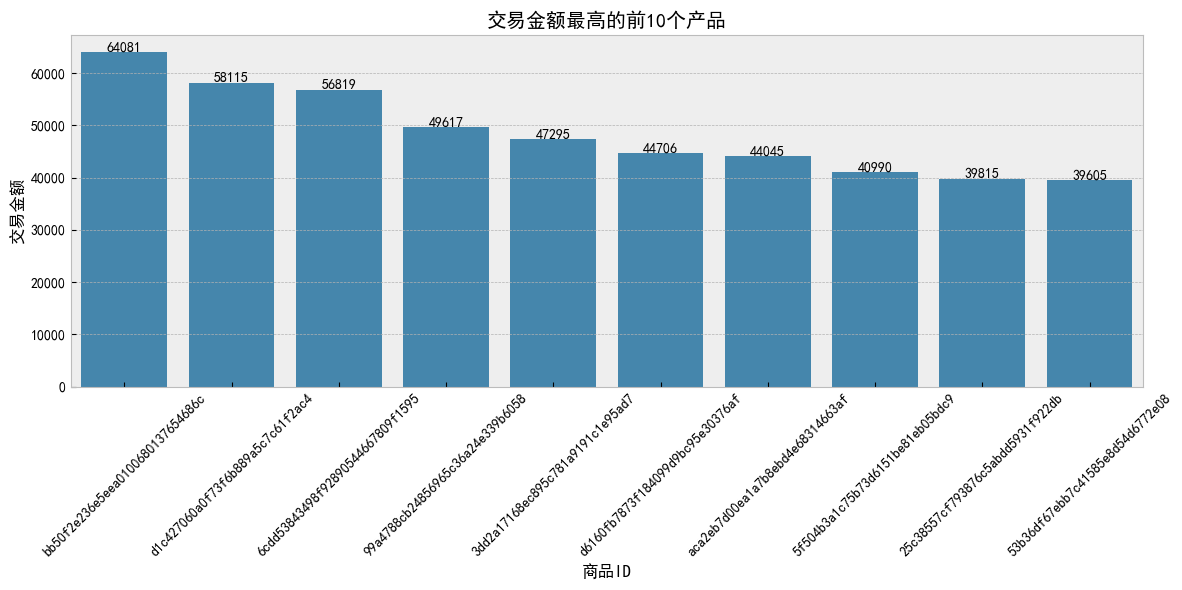

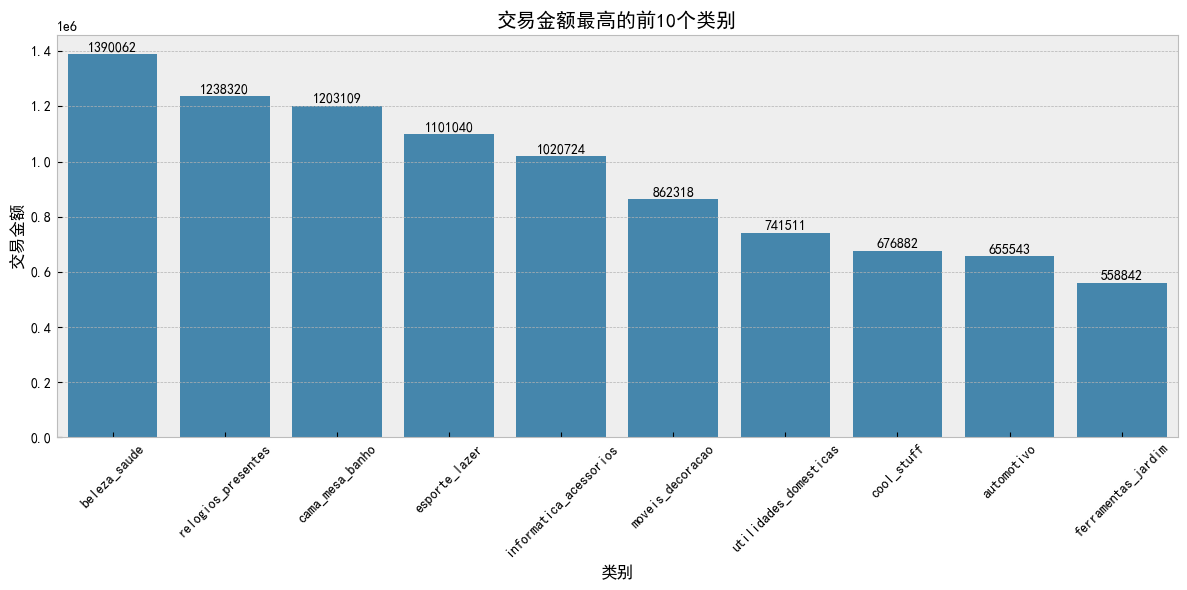

In [86]:
def analyze_product_dimension(df: pd.DataFrame) -> None:
    """分析产品维度数据"""
    if df.empty:
        print("没有数据可用于产品维度分析")
        return
    
    # 分析商品类别和数量
    category_count = df['商品类别'].nunique()
    product_count = df['商品ID'].nunique()
    
    # 计算平均售价
    avg_price = df['产品价格'].mean() if '产品价格' in df.columns else 0
    
    print("\n产品维度分析结果:")
    print(f"2017-2018各商家共供货 {category_count} 种品类，{product_count} 种产品")
    print(f"平均售价为 {avg_price:.2f} 元")
    
    # 分析top10产品
    if '商品ID' in df.columns and '支付金额' in df.columns:
        top_products = df.groupby('商品ID').agg({
            '支付金额': 'sum',
            '订单ID': pd.Series.nunique
        }).rename(columns={
            '支付金额': '交易金额',
            '订单ID': '订单量'
        }).reset_index().sort_values('交易金额', ascending=False).head(10)
        
        print("\nTop10产品:")
        print(top_products)
        
        top_product = top_products.iloc[0]
        print(f"商品ID:{top_product['商品ID']}的交易金额最多，为 {top_product['交易金额']:.2f} 元")
        
        # 创建图表
        plt.figure(figsize=(12, 6))
        
        # Top10产品交易金额柱状图
        ax = sns.barplot(x='商品ID', y='交易金额', data=top_products)
        plt.title('交易金额最高的前10个产品')
        plt.xlabel('商品ID')
        plt.ylabel('交易金额')
        plt.xticks(rotation=45)
        for i, v in enumerate(top_products['交易金额']):
            ax.text(i, v + 100, f'{v:.0f}', ha='center')
        
        plt.tight_layout()
        plt.savefig('top_products.png')
        print("Top10产品图表已保存为 top_products.png")
    
    # 分析产品类别
    if '商品类别' in df.columns and '支付金额' in df.columns:
        category_sales = df.groupby('商品类别').agg({
            '支付金额': 'sum'
        }).rename(columns={
            '支付金额': '交易金额'
        }).reset_index().sort_values('交易金额', ascending=False)
        
        # 计算总交易额
        total_sales = category_sales['交易金额'].sum()
        
        # 计算累计占比
        category_sales['累计占比'] = category_sales['交易金额'].cumsum() / total_sales * 100
        
        # 找出占总交易额62.47%的类别数量
        top10_categories = category_sales[category_sales['累计占比'] <= 62.47]
        top17_categories = category_sales[category_sales['累计占比'] <= 79.94]
        
        print(f"\n前{len(top10_categories)}类别名称的占了总交易额的62.47%")
        print(f"前{len(top17_categories)}类别名称的占了总交易额的79.94%")
        
        # 创建图表
        plt.figure(figsize=(12, 6))
        
        # 类别交易额柱状图
        ax = sns.barplot(x='商品类别', y='交易金额', data=category_sales.head(10))
        plt.title('交易金额最高的前10个类别')
        plt.xlabel('类别')
        plt.ylabel('交易金额')
        plt.xticks(rotation=45)
        for i, v in enumerate(category_sales.head(10)['交易金额']):
            ax.text(i, v + 10000, f'{v:.0f}', ha='center')
        
        plt.tight_layout()
        plt.savefig('top_categories.png')
        print("Top10类别图表已保存为 top_categories.png")
 # 产品维度分析
analyze_product_dimension(df)
    

<mark>品类和产品数量反映供给丰富度，数量过少可能限制用户选择，过多可能导致管理成本上升；
平均售价反映平台的商品定位（如平价、高端），结合客单价可判断商品与用户需求的匹配度（如高客单价用户对应高端商品）；
Top10 产品 / 类别是营收的核心贡献者，需保障库存、优化详情页以维持销量；
累计占比分析（如前 10 类占 62.47%）反映品类集中度，集中度高说明依赖少数品类，需拓展潜力品类降低风险。<mark>


支付维度分析结果:
支付类型分布:
          支付类型    订单量         占比
0       boleto  19140  19.893775
1  credit_card  72920  75.791749
2   debit_card   1483   1.541404
3      voucher   2668   2.773072
支付类型分布图表已保存为 payment_method.png

交易金额分布:
      金额区间    订单量         占比
0     0-50  17553  18.244276
1   50-100  29069  30.213801
2  100-150  18942  19.687977
3  150-200  11547  12.001746
4  200-250   6249   6.495099
5  250-300   3183   3.308354
6    300以上   9668  10.048747


C:\Users\12306\AppData\Local\Temp\ipykernel_3988\1783956525.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amount_range = df.groupby('金额区间').agg({


交易金额分布图表已保存为 amount_distribution.png


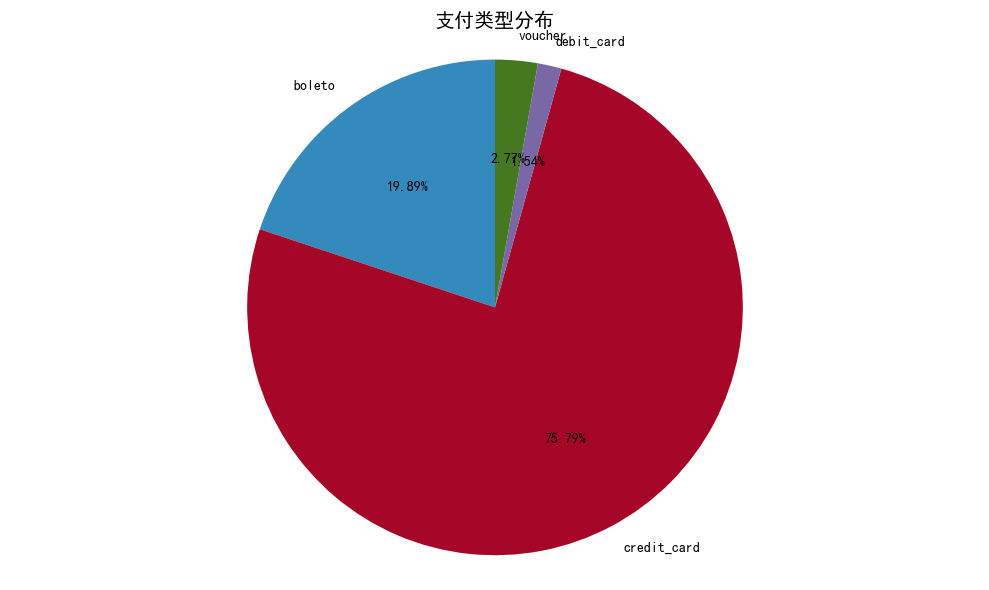

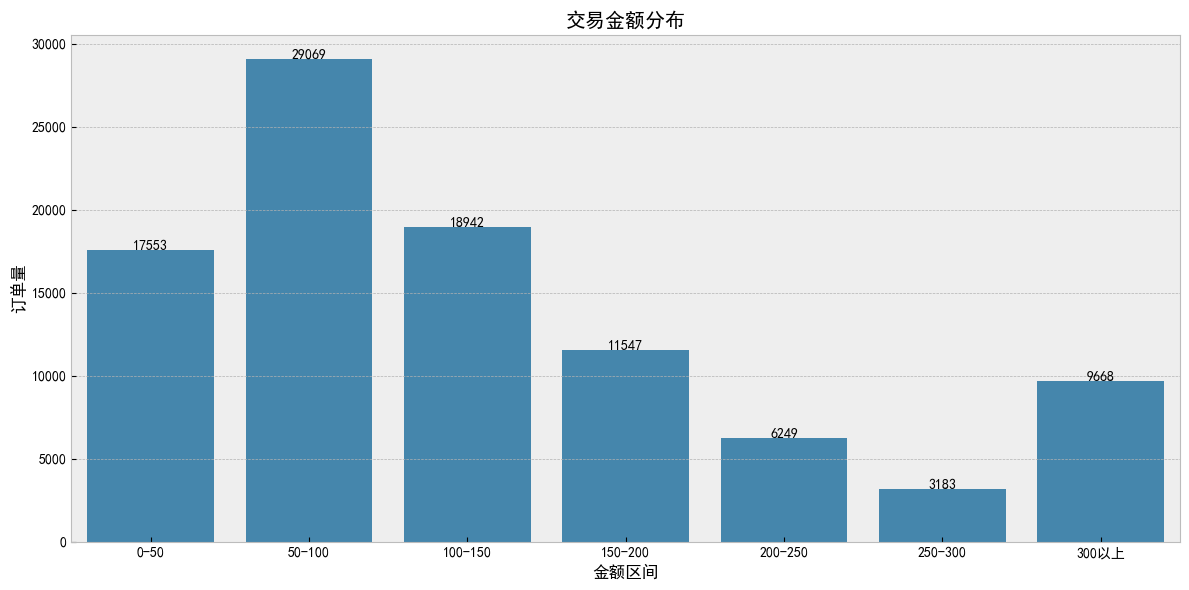

In [87]:
def analyze_payment_dimension(df: pd.DataFrame) -> None:
    """分析支付维度数据"""
    if df.empty:
        print("没有数据可用于支付维度分析")
        return
    
    # 分析支付类型分布
    payment_method = df.groupby('支付类型').agg({
        '订单ID': pd.Series.nunique
    }).rename(columns={
        '订单ID': '订单量'
    }).reset_index()
    
    # 计算总订单量
    total_orders = payment_method['订单量'].sum()
    
    # 计算占比
    payment_method['占比'] = payment_method['订单量'] / total_orders * 100
    
    print("\n支付维度分析结果:")
    print("支付类型分布:")
    print(payment_method)
    
    # 创建图表
    plt.figure(figsize=(10, 6))
    
    # 支付类型饼图
    plt.pie(payment_method['订单量'], labels=payment_method['支付类型'], autopct='%1.2f%%', startangle=90)
    plt.title('支付类型分布')
    plt.axis('equal')  # 保证饼图是圆的
    
    plt.tight_layout()
    plt.savefig('payment_method.png')
    print("支付类型分布图表已保存为 payment_method.png")
    
    # 分析分期付款
    if '分期付款数' in df.columns:
        installment_data = df.groupby('分期付款数').agg({
            '订单ID': pd.Series.nunique
        }).rename(columns={
            '订单ID': '订单量'
        }).reset_index()
        
        # 计算总订单量
        total_installment_orders = installment_data['订单量'].sum()
        
        # 计算占比
        installment_data['占比'] = installment_data['订单量'] / total_installment_orders * 100
        
        print("\n分期付款分析:")
        print(installment_data)
        
        # 创建图表
        plt.figure(figsize=(12, 6))
        
        # 分期付款柱状图
        ax = sns.barplot(x='分期付款数', y='订单量', data=installment_data)
        plt.title('分期付款数分布')
        plt.xlabel('分期付款数')
        plt.ylabel('订单量')
        for i, v in enumerate(installment_data['订单量']):
            ax.text(i, v + 10, f'{v}', ha='center')
        
        plt.tight_layout()
        plt.savefig('installment_plans.png')
        print("分期付款分布图表已保存为 installment_plans.png")
        
        # 分析分期付款与支付类型的关系
        if '支付类型' in df.columns:
            installment_payment = df.groupby(['分期付款数', '支付类型']).agg({
                '订单ID': pd.Series.nunique
            }).rename(columns={
                '订单ID': '订单量'
            }).reset_index()
            
            print("\n分期付款与支付类型的关系:")
            print(installment_payment)
    
    # 分析交易金额分布
    if '支付金额' in df.columns:
        # 定义金额区间
        bins = [0, 50, 100, 150, 200, 250, 300, float('inf')]
        labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300以上']
        
        # 计算各区间的订单量
        df['金额区间'] = pd.cut(df['支付金额'], bins=bins, labels=labels, right=False)
        amount_range = df.groupby('金额区间').agg({
            '订单ID': pd.Series.nunique
        }).rename(columns={
            '订单ID': '订单量'
        }).reset_index()
        
        # 计算总订单量
        
        total_amount_orders = amount_range['订单量'].sum()
        
        # 计算占比
        amount_range['占比'] = amount_range['订单量'] / total_amount_orders * 100
        
        print("\n交易金额分布:")
        print(amount_range)
        
        # 创建图表
        plt.figure(figsize=(12, 6))
        
        # 交易金额分布柱状图
        ax = sns.barplot(x='金额区间', y='订单量', data=amount_range)
        plt.title('交易金额分布')
        plt.xlabel('金额区间')
        plt.ylabel('订单量')
        for i, v in enumerate(amount_range['订单量']):
            ax.text(i, v + 10, f'{v}', ha='center')
        
        plt.tight_layout()
        plt.savefig('amount_distribution.png')
        print("交易金额分布图表已保存为 amount_distribution.png")
        
    # 支付维度分析
analyze_payment_dimension(df)

与此同时，我们分析了原作者接下来的分析流程 

原作者不仅按年份分析了订单金额等数据，更着重于按季度分析订单量和订单金额的关系 ,如下图所示

![原作者季度分析图](./p1.png)

<mark> 小组分析认为，按季度可宏观得到哪些月份的订单量和订单金额更高，这为后续按月份分析该信息做好铺垫，同时采用柱状图与折线图相结合的方式，将两组数据放在一个图中，简洁明了 <mark>

原作者后续按月份分析月交易情况，并针对突出月份进行了下钻分析

![原作者月份分析图](./p2.png)

<mark>这里采用双折现图使得高峰月份突出明显，更引出后续下钻研究的动机 <mark>

![原作者对爆款月的分析图](./p3.png)

<mark>原作者随后定位到了该月份的订单量与交易金额最高的日期，并基于此作深入研究，同时通过对商业活动的了解，合理推断出该日期交易额最高的原因 <mark>

![原作者对产品分类与州地区分析](./p4.png)

<mark> 小组分析认为，当日期时间挖掘之后，可以按地理区域与商品类别再做进一步的分析，得出爆款产品与高消费州 <mark>

![原作者对工作日与时段分析](./p5.png)

<mark> 原作者继续深入挖掘时间对巴西人民消费的影响，分为工作日和一天的不同时段，采用雷达图和曲线图的形式，雷达图使得各点数据突出，同时符合工作日七天数据列少的情况，时间段用曲线图，线条柔和且表现效果清晰 <mark>

![原作者基于商家维度进行分析](./p6.png)

<mark> 由于数据包含了商家与顾客，因此分析的角度可以是多元性的，原作者站在商家角度对商家信息进行了分析，并基于地理位置信息得出商家销售额较高的几大城市 <mark>

![原作者基于用户维度分析图](./p7.png)

<mark> 通过对用户信息进行分析，再辅以预测模型，能得到用户价值分析图，该分析图极具现实意义价值 <mark>

<mark> 后续原作者又站在产品维度与支付维度，深入探讨了不同维度下值得关注的信息，将数据集从不同角度剖析，并在剖析中找到数据集的价值所在，并且图表美观，简介易懂，注释分析简短有力，配合图文能让读者信服。以上种种都是我们小组分析之后学习到的成果，在以后数据分析中争取学以致用，得到更好的分析结果。 <mark>